# Consignes projet 4

**Anticipez les besoins en consommation électrique de bâtiments**
* Lien vers consignes : https://openclassrooms.com/fr/projects/629/assignment
* Lien vers score Star Energy : https://www.energystar.gov/

* Lien vers la signification des colonnes (trouvé via recherche web) : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

- remettre energyscore et relancer le model et savoir si il interessant de la garder.
- afficher les features importantes 
- faire tableau pour comparer les r2 et mape et rsme de chaque modele
- ne pas faire la permutation car tu as les colonnes importantes dans feature_importances_


In [121]:
!pip install cython
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 70.9/70.9 MB 21.1 MB/s eta 0:00:00


# Imports

In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [749]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

# Chargement jeu de données

In [750]:
data = pd.read_csv('data/data_cleaned_SEU.csv')

In [751]:
d_corr = data.copy()

In [752]:
data.head()

index PrimaryPropertyType Neighborhood  YearBuilt  NumberofBuildings  \
0  0      Hotel               DOWNTOWN     1927       1.0                 
1  1      Hotel               DOWNTOWN     1996       1.0                 
2  3      Hotel               DOWNTOWN     1926       1.0                 
3  4      Hotel               DOWNTOWN     1980       1.0                 
4  6      Hotel               DOWNTOWN     1926       1.0                 

   NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
0  12              0                   88434                    
1  11              15064               88502                    
2  10              0                   61320                    
3  18              62000               113580                   
4  11              0                   83008                    

                LargestPropertyUseType SecondLargestPropertyUseType  \
0  Residence/Hotel/Senior Care/Housing  Other                         
1  Residence/Hotel/Senior Care/Housing  Parking                       
2  Residence/Hotel/Senior Care/Housing  Other                         
3  Residence/Hotel/Senior Care/Housing  Parking                       
4  Residence/Hotel/Senior Care/Housing  Other                         

   SecondLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0  0.0                              60.0             81.699997          
1  15064.0                          61.0             94.800003          
2  0.0                              56.0             110.800003         
3  68009.0                          75.0             114.800003         
4  0.0                              27.0             70.800003          

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0  7226362.5            7456910.0              2003882.00       
1  8387933.0            8664479.0              0.00             
2  6794584.0            6946800.5              2214446.25       
3  14172606.0           14656503.0             0.00             
4  5758795.0            6062767.5              0.00             

   Electricity(kWh)  NaturalGas(kBtu)  GHGEmissionsIntensity  \
0  1.156514e+06      1276453.0         2.83                    
1  9.504252e+05      5145082.0         2.86                    
2  8.115253e+05      1811213.0         4.67                    
3  1.573449e+06      8803998.0         2.88                    
4  8.239199e+05      2947580.0         2.12                    

   SteamUse(percent)  Electricity(percent)  NaturalGas(percent)  \
0  0.277302           0.546060              0.176638              
1  0.000000           0.386609              0.613391              
2  0.325913           0.407519              0.266567              
3  0.000000           0.378802              0.621198              
4  0.000000           0.488160              0.511840              

   Log2-SiteEnergyUseWN(kBtu)  
0  22.830147                   
1  23.046682                   
2  22.727917                   
3  23.805038                   
4  22.531545

In [753]:
data.dtypes

index                              int64  
PrimaryPropertyType                object 
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
NaturalGas(kBtu)                   float64
GHGEmissionsIntensity              float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUseWN(kBtu)         float64
dtype: obje

In [754]:
data.shape

(962, 23)

In [755]:
# # Liste des colonnes à conserver
# selected_columns = ['BuildingType', 'PrimaryPropertyType', 
#                     'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
#                     'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore','Log2-SiteEnergyUseWN(kBtu)']

# # Suppression des colonnes non sélectionnées
# data = data[selected_columns]
# 	index	DataYear	BuildingType	PrimaryPropertyType	CouncilDistrictCode	Neighborhood	YearBuilt	NumberofBuildings	NumberofFloors	PropertyGFATotal	PropertyGFAParking	PropertyGFABuilding(s)	LargestPropertyUseType	LargestPropertyUseTypeGFA	SecondLargestPropertyUseType	SecondLargestPropertyUseTypeGFA	ThirdLargestPropertyUseType	ThirdLargestPropertyUseTypeGFA	ENERGYSTARScore	SiteEnergyUseWN(kBtu)	Outlier	Latitude	Longitude	TotalGHGEmissions	Log2-SiteEnergyUseWN(kBtu)
# index
# DataYear
# BuildingType
# PrimaryPropertyType
# CouncilDistrictCode
# Neighborhood
# YearBuilt
# NumberofBuildings 
# NumberofFloors
# PropertyGFATotal
# PropertyGFAParking
# PropertyGFABuilding(s)
# LargestPropertyUseType
# LargestPropertyUseTypeGFA
# SecondLargestPropertyUseType
# SecondLargestPropertyUseTypeGFA
# ThirdLargestPropertyUseType
# ThirdLargestPropertyUseTypeGFA
# ENERGYSTARScore
# SiteEnergyUseWN(kBtu)
# Outlier
# Latitude
# Longitude
# TotalGHGEmissions
# Log2-SiteEnergyUseWN(kBtu)

In [756]:
data.dtypes

index                              int64  
PrimaryPropertyType                object 
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
NaturalGas(kBtu)                   float64
GHGEmissionsIntensity              float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUseWN(kBtu)         float64
dtype: obje

In [757]:
data.isna().sum().sum()

0

La colonne "ENERGYSTARScore" fait référence au score ENERGY STAR attribué à un bâtiment. ENERGY STAR est un programme international qui évalue et classe l'efficacité énergétique des bâtiments, en leur attribuant un score sur une échelle de 1 à 100. Ce score permet de comparer la performance énergétique d'un bâtiment par rapport à des bâtiments similaires.

Un score ENERGY STAR élevé, proche de 100, indique une efficacité énergétique supérieure, ce qui signifie que le bâtiment consomme moins d'énergie pour fonctionner et a un impact environnemental réduit. Un score plus bas, proche de 1, indique une efficacité énergétique plus faible.

In [758]:
#sauvegarde séparée du energy star score
energy_star_score = data['ENERGYSTARScore']
data.drop('ENERGYSTARScore', axis=1, inplace=True)
# data.drop('SiteEnergyUse(kBtu)', axis=1, inplace=True)

In [759]:
data.shape

(962, 22)

In [760]:
data.isna().sum().sum()

0

# Préparation des vecteurs et matrices

## Séparation X et y 

La colonne "SiteEnergyUseWN(kBtu)" fait référence à la consommation d'énergie totale du site, mesurée en kilo British Thermal Units (kBtu). Cette mesure représente la quantité totale d'énergie utilisée par un bâtiment sur une période donnée, généralement sur une base annuelle.

In [761]:
# y = data.copy()[{'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions' , 'Log2-SiteEnergyUseWN(kBtu)'}]
# X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1)
# Sélection des colonnes 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'
# pour créer le DataFrame y contenant ces colonnes
y = data.copy()[{'Log2-SiteEnergyUseWN(kBtu)'}] #1 variable a expliquer, ou la cible 
# y = data.copy()[{'SiteEnergyUseWN(kBtu)'}] #1 variable a expliquer, ou la cible 

# Création du DataFrame X en faisant une copie de data et en supprimant les colonnes 
# 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions', 'Log2-SiteEnergyUseWN(kBtu)'
# X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'Log2-SiteEnergyUseWN(kBtu)','TotalGHGEmissions','Log2-TotalGHGEmissions'], axis=1) 
# plusieurs variable qui explique Y 
X = data.copy().drop(['SiteEnergyUseWN(kBtu)', 'Log2-SiteEnergyUseWN(kBtu)'], axis=1) 

## Normalisation & One Hot Encoder 

la normalisation est utilisée pour mettre à l'échelle les valeurs numériques et les rendre comparables, tandis que le codage one-hot est utilisé pour représenter les variables catégorielles sous forme de variables binaires distinctes. Ces techniques permettent d'améliorer les performances des modèles d'apprentissage automatique en rendant les données plus adaptées à l'apprentissage et à la prédiction.

In [762]:
X.select_dtypes(['category','object']).nunique()

PrimaryPropertyType             18
Neighborhood                    13
LargestPropertyUseType          11
SecondLargestPropertyUseType    11
dtype: int64

In [763]:
X.shape

(962, 20)

In [764]:
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int8','int64','int32','float32','float64']).columns

In [765]:
categorical_columns

Index(['PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType'],
      dtype='object')

In [766]:
numerical_columns

Index(['index', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
       'Electricity(percent)', 'NaturalGas(percent)'],
      dtype='object')

In [767]:
numerical_columns_y = y.select_dtypes(['int8','int64','int32','float32','float64']).columns
numerical_columns_y

Index(['Log2-SiteEnergyUseWN(kBtu)'], dtype='object')

In [768]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ohe = OneHotEncoder(sparse=False)
# ss = StandardScaler()
# X[numerical_columns] = ss.fit_transform(X[numerical_columns])
# ohe.fit_transform(X[categorical_columns])

# X = pd.merge(X[numerical_columns], 
#           pd.DataFrame(columns = ohe.get_feature_names().tolist(),
#               data = ohe.fit_transform(X[categorical_columns])),
#         left_index = True, right_index = True)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Instanciation de l'encodeur OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Instanciation du StandardScaler
ss = StandardScaler()

# Standardisation des colonnes numériques dans X à l'aide de StandardScaler
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

# Encodage One-Hot des colonnes catégorielles dans X à l'aide de OneHotEncoder
ohe.fit_transform(X[categorical_columns])

# Fusion des colonnes numériques standardisées avec les colonnes catégorielles encodées
# en utilisant pd.merge pour combiner les DataFrames
X = pd.merge(X[numerical_columns],
             pd.DataFrame(columns=ohe.get_feature_names().tolist(),
                          data=ohe.fit_transform(X[categorical_columns])),
             left_index=True, right_index=True)


Transformation des types des catégories sorties du one hot encoding

In [769]:
# import re
# regex = re.compile(r'x\d_')
# for column in X.columns:
#     if regex.search(column):
#         X[column] = X[column].astype('int32')
import re

# Compilation de l'expression régulière
regex = re.compile(r'x\d_')

# Parcours de chaque colonne dans X
for column in X.columns:
    # Vérification si la colonne correspond au motif de l'expression régulière
    if regex.search(column):
        # Conversion de la colonne en type 'int32'
        X[column] = X[column].astype('int32')


In [770]:
X.sample(5)

index  YearBuilt  NumberofBuildings  NumberofFloors  \
784  1.008445 -0.276821   0.047876          -0.378687         
395 -0.642490 -0.090226   0.047876          -0.244804         
567  0.058437 -1.023200   0.047876          -0.378687         
263 -0.839079 -1.769579   0.047876           0.290730         
599  0.214885  0.127468   0.047876          -0.244804         

     PropertyGFAParking  PropertyGFABuilding(s)  \
784 -0.348151           -0.508914                 
395  0.731741           -0.230837                 
567 -0.348151           -0.355229                 
263 -0.348151           -0.013621                 
599 -0.348151           -0.403659                 

     SecondLargestPropertyUseTypeGFA  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
784 -0.412557                        -0.082692         -0.536796              
395 -0.412557                         3.905886          1.285913              
567 -0.412557                         0.499364         -0.221790              
263  0.099303                         0.193412          0.046436              
599 -0.341497                        -0.317753         -0.499039              

     SteamUse(kBtu)  Electricity(kWh)  NaturalGas(kBtu)  \
784 -0.163813       -0.535638         -0.215536           
395 -0.163813        1.675788         -0.490999           
567 -0.163813       -0.502192          0.906519           
263 -0.163813       -0.007538          0.298404           
599 -0.163813       -0.515681         -0.134536           

     GHGEmissionsIntensity  SteamUse(percent)  Electricity(percent)  \
784  0.442799              -0.222452          -1.105423               
395 -0.088937              -0.222452           1.013027               
567  1.759172              -0.222452          -2.025690               
263  0.053724              -0.222452          -0.079729               
599  0.086147              -0.222452          -1.096255               

     NaturalGas(percent)  x0_Distribution Center  x0_Hospital  x0_Hotel  \
784  1.188990             0                       0            0          
395 -0.944025             0                       0            0          
567  2.115583             0                       0            0          
263  0.156244             0                       0            0          
599  1.179758             0                       0            0          

     x0_K-12 School  x0_Large Office  x0_Low-Rise Multifamily  \
784  0               0                0                         
395  0               1                0                         
567  1               0                0                         
263  0               0                0                         
599  0               0                0                         

     x0_Medical Office  x0_Mixed Use Property  x0_Office  x0_Other  \
784  0                  0                      0          0          
395  0                  0                      0          0          
567  0                  0                      0          0          
263  0                  0                      0          0          
599  1                  0                      0          0          

     x0_Refrigerated Warehouse  x0_Residence Hall  x0_Retail Store  \
784  0                          0                  1                 
395  0                          0                  0                 
567  0                          0                  0                 
263  0                          0                  0                 
599  0                          0                  0                 

     x0_Senior Care Community  x0_Small- and Mid-Sized Office  \
784  0                         0                                
395  0                         0                                
567  0                         0                                
263  0                         1                                
599  0                         0                        

## Infos sur X et y

In [771]:
X.shape

(962, 69)

In [772]:
y.shape

(962, 1)

# Séparation jeu de données

**Séparation test / train**

In [773]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = \
#                         train_test_split(X, 
#                                          y['Log2-SiteEnergyUseWN(kBtu)'],  
#                                          test_size = 0.2, 
#                                          random_state = 42
#                                         )
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
# avec 80% des données pour l'ensemble d'entraînement et 20% pour l'ensemble de test
# Les variables explicatives sont stockées dans X et la variable cible est y['Log2-SiteEnergyUseWN(kBtu)']
# random_state est utilisé pour garantir la reproductibilité des résultats
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y['Log2-SiteEnergyUseWN(kBtu)'],  
                                                    test_size=0.2, 
                                                    random_state=42)


In [774]:
X_train.shape

(769, 69)

In [775]:
X_test.shape

(193, 69)

In [776]:
y_train.shape

(769,)

In [777]:
y_test.shape

(193,)

In [778]:
results = pd.DataFrame({})

In [779]:
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())
print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())


0
0
0
0


# Modélisation

**Imports**

In [780]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Linear Regression / Ridge Regression / Lasso / Elastic Net

Le modèle Elastic Net comprend les modèles linéaires / ridge et lasso via les valeurs des coefficients dans le grid search CV

In [781]:
#rappel de la fonction de coût du elasticnet
#1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

# Importation de la classe ElasticNet depuis la bibliothèque sklearn.linear_model
from sklearn.linear_model import ElasticNet

# Définition des paramètres pour la recherche sur grille
parameters = {'tol' : [0.1,0.01,0.001,0.0001],  # Tolérance de la convergence de l'algorithme #alpha, coef qui multiplie le terme de pénalité)
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre alpha (termes de pénalité)
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}  # Ratio de mélange entre les termes L1 et L2 #L1 ratio , =1 équivaut à un Lasso, 0 à un Ridge

# Création de l'estimateur ElasticNet et de la grille de recherche sur les paramètres
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                      param_grid=parameters,
                      scoring='neg_mean_squared_error',  # Métrique de performance à optimiser
                      cv=5,  # Nombre de folds pour la validation croisée
                      verbose=0)

# Recherche des meilleurs paramètres sur la grille en utilisant les données d'entraînement
elastic_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

Cette commande qui permet d'afficher les meilleurs paramètres choisis par la méthode de recherche par grille (GridSearchCV) pour un modèle de régression aléatoire (ElasticNet).

In [782]:
elastic_grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9, 'tol': 0.001}

{'alpha': 0.001, 'l1_ratio': 0.9, 'tol': 0.001}

Le modèle optimal a les caractéristiques suivantes:
* alpha = 0.001 : le terme de régularisation Lasso (L1) est quasiment nul mais il ne s'agit pas de notre paramètre le plus faible dasn le grid search CV
* le terme l1_ratio est approximativement de 0.4, signifiant que le poids du L1 est plus important que celui du L2 dans la régularisation 

In [783]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(elastic_grid.predict(X_test), y_test))]}),
              ignore_index=True)

ils existent plusieurs métriques différentes pour évaluer, 5 exemples :

- R2 (Coefficient de détermination)
- MAE (erreur absolue moyenne)
- RMSE (erreur quadratique moyenne)
- MPSE (erreur quadratique moyenne en pourcentage)
- Taux de prédictions entre 90 et 110 % de la valeur réelle

- Coefficient de détermination (R²) : C'est le score qui mesure la proportion de la variance de la variable cible (y) expliquée par les variables explicatives (X) du modèle. Plus le R² est proche de 1, meilleur est le modèle.

- Erreur absolue moyenne (MAE) : C'est la moyenne des écarts absolus entre les valeurs prédites et les valeurs réelles. Elle mesure la magnitude moyenne de l'erreur sans tenir compte de sa direction.

- Erreur quadratique moyenne (RMSE) : C'est la racine carrée de la moyenne des écarts quadratiques entre les valeurs prédites et les valeurs réelles. Elle mesure la dispersion des erreurs et est plus sensible aux valeurs aberrantes que la MAE.

- Erreur quadratique moyenne en pourcentage (MPSE) : C'est le RMSE normalisé en pourcentage par rapport à la moyenne des valeurs réelles. Il permet de comparer l'erreur du modèle par rapport à l'échelle des valeurs réelles.

- Taux de prédictions entre 90% et 110% de la valeur réelle : C'est le pourcentage des prédictions qui se situent dans une fourchette de ±10% par rapport aux valeurs réelles. Il mesure la précision du modèle dans la prédiction des valeurs proches de la réalité.

In [784]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Prédiction sur les données de test
y_pred_test = elastic_grid.predict(X_test)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred_test)
print("R² :", r2)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :", mae)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE :", rmse)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


R² : 0.8047296504530177
MAE : 0.5770853097646721
RMSE : 0.7326203389882038
MPSE : 3.395029083562331
Taux de prédictions entre 90% et 110% : 97.92746113989638


In [785]:
# Calcul du RMSE
y_pred_test = elastic_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 7033686.8279470485
MAPE (exp) : 0.44713154571197744
R² (exp) : 0.07609584319194196
MPSE : 224.48874291731124
Taux de prédictions entre 90% et 110% : 16.06217616580311


## Random Forest Regressor

In [786]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

In [787]:
rfr_search = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

rfr_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.6s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [788]:
rfr_search.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}

<!-- {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300} -->
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 300}

Cette commande qui permet d'afficher les meilleurs paramètres choisis par la méthode de recherche par grille (GridSearchCV) pour un modèle de régression aléatoire (RandomForestRegressor).

Plus précisément, la méthode best_params_ de l'objet rfr_search renvoie un dictionnaire de paramètres avec leurs valeurs correspondantes, qui ont donné la meilleure performance lors de la validation croisée. Dans votre cas, les paramètres suivants ont été sélectionnés comme les meilleurs :

- max_features: Cette option détermine le nombre maximum de fonctionnalités à utiliser pour chaque arbre de décision dans la forêt aléatoire. Ici, la valeur "sqrt" est choisie, ce qui signifie que le nombre de fonctionnalités sera égal à la racine carrée du nombre total de fonctionnalités dans l'ensemble de données.
- min_samples_leaf: Cet hyperparamètre est le nombre minimum d'échantillons requis pour être au niveau de la feuille d'un arbre de décision. Une valeur de 3 a été choisie ici, ce qui signifie qu'un nœud doit avoir au moins 3 échantillons pour être considéré comme une feuille.
- n_estimators: Cet hyperparamètre détermine le nombre d'arbres dans la forêt aléatoire. Ici, une valeur de 300 a été choisie.
En utilisant ces paramètres pour entraîner le modèle de régression aléatoire, vous devriez obtenir la meilleure performance possible.

In [789]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Calcul du RMSE
y_pred_test = rfr_search.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)



RMSE(log): 0.05890686678954665
MAPE(log): 0.0021103326644758354
R²(log): 0.998737561565331
MPSE : 0.27297976227119597
Taux de prédictions entre 90% et 110% : 100.0


In [790]:
# Calcul du RMSE
y_pred_test = rfr_search.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 264295.1969926334
MAPE (exp) : 0.030367825365119044
R² (exp) : 0.9986955140452418
MPSE : 8.435305407146863
Taux de prédictions entre 90% et 110% : 97.40932642487047


In [791]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Random Forest Regressor'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(rfr_search.predict(X_test), y_test))]}),
              ignore_index=True)

In [553]:
coefficients = abs(rfr_search.best_estimator_.feature_importances_)
liste_coefs_rer = pd.concat((pd.DataFrame(X.columns, columns = ['Variable']), 
                      pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

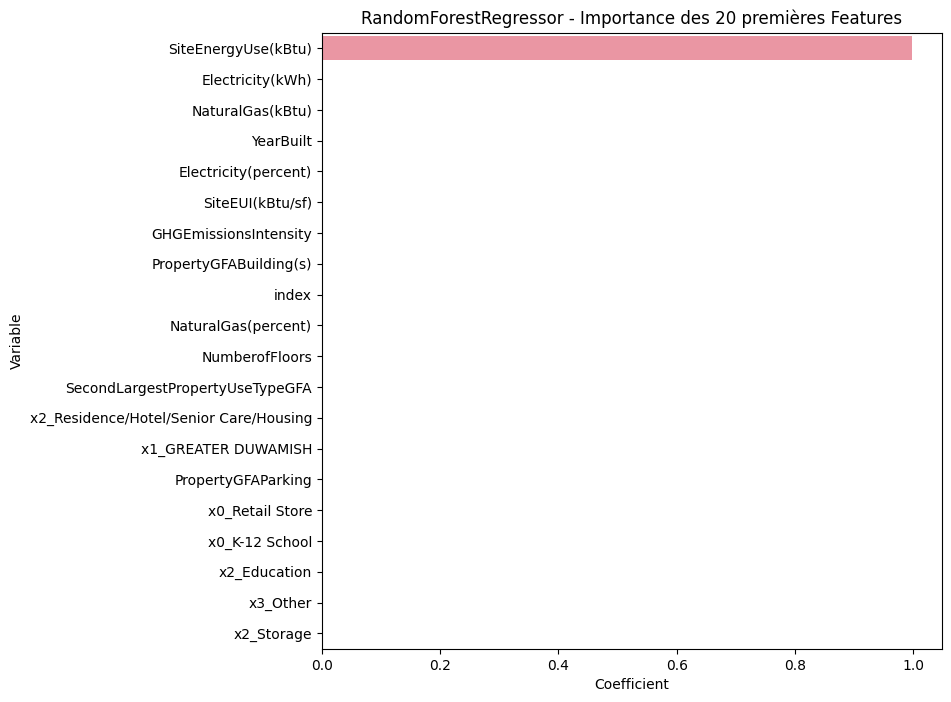

In [554]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')
sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))
plt.show()

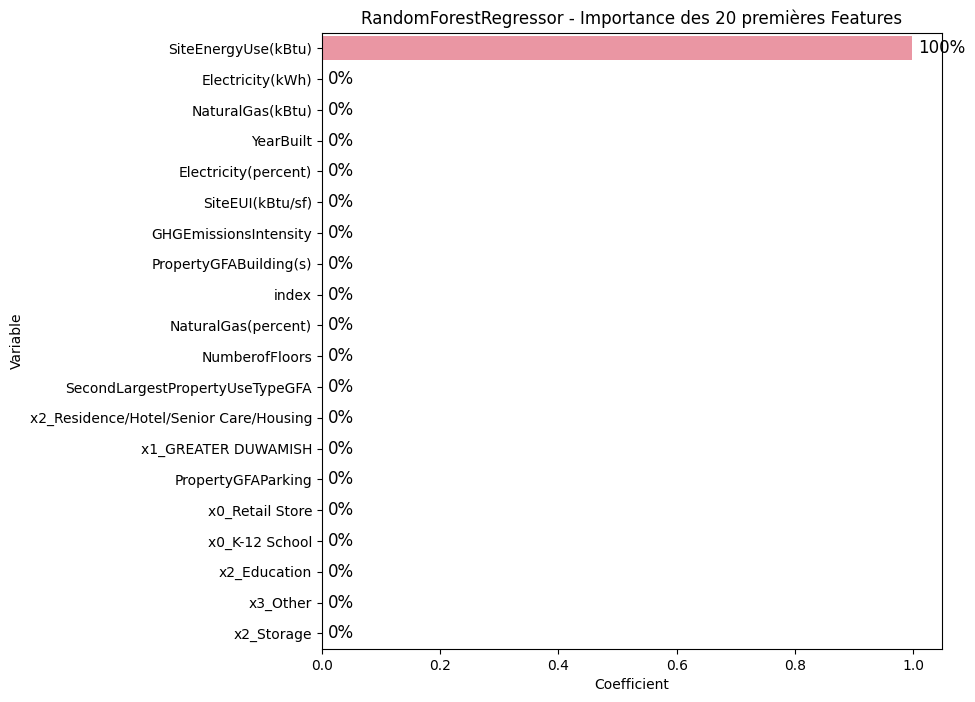

In [555]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Importance des 20 premières Features')

# Créer le graphique à barres
barplot = sns.barplot(y = liste_coefs_rer['Variable'].head(20),
            x = liste_coefs_rer['Coefficient'].head(20))

# Parcourir toutes les barres et ajouter les pourcentages correspondants
for p in barplot.patches:
    width = p.get_width()    # Récupérer la largeur de la barre
    percentage = width * 100    # Calculer le pourcentage
    plt.text(width + 0.01,    # Ajouter un petit décalage
             p.get_y() + p.get_height() / 2,    # Récupérer la hauteur de la barre
             f'{percentage:.0f}%',    # Afficher le pourcentage sans décimale
             ha='left',    # Aligner à gauche
             va='center',    # Centrer verticalement
             fontsize=12)    # Taille de la police


plt.show()


## Support Vector Regression 

In [556]:
from sklearn.svm import SVR

parameters = {'gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], #kernel coefficient [ici kernel = Radial Basis Function]
              'epsilon' : [0.001, 0.01, 0.1, 1], #erreur tolérée par l'algorithme
              'C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

svm = GridSearchCV(estimator = SVR(), 
                      param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                      cv=5,
                   verbose=2
                     )

svm.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-07; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.001, gamma=1e-06; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.00

[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................C=0.001, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................C=0.001, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.001, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ....................C=0.001, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-06; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, gamma=1e-05; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ......................C=0.01, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.01, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ..................C=0.1, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ..................C

[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................C=0.1, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END ......................C=1, epsilon=0.001, gamma=0.1; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-08; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, gamma=1e-07; total time=   0.0s
[CV] END ...................

[CV] END ........................C=1, epsilon=1, gamma=0.001; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ...................C=10, epsilon=0.001, gamma=1e-08; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, epsilon=0.1, gamma=1e-06; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=1e-05; total time=   0.0s
[CV] END ....................C=10, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ....................C=10, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ....................C=10, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ....................C=10, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END ....................C=10, epsilon=0.1, gamma=0.0001; total time=   0.0s
[CV] END .....................C=10, epsilon=0.1, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1]},
             verbose=2)

In [557]:
svm.best_params_

{'C': 10, 'epsilon': 0.01, 'gamma': 0.01}

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01}

In [558]:
results = results.append(pd.DataFrame({
    'Modèle' : ['Support Vector Machine'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(svm.predict(X_test), y_test))]}),
              ignore_index=True)

In [559]:
results

Modèle  Score_RMSE
0  Elasticnet Regression    0.732620  
1  Random Forest Regressor  0.059372  
2  Support Vector Machine   0.493953

In [560]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = svm.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)



RMSE(log): 0.4939534082958078
MAPE(log): 0.014156903615140227
R²(log): 0.9112332470649016
MPSE : 2.2890248848469494
Taux de prédictions entre 90% et 110% : 99.48186528497409


In [561]:
# Calcul du RMSE
y_pred_test = svm.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)


RMSE (exp): 2035566.3556247735
MAPE (exp) : 0.3062153858594717
R² (exp) : 0.9226195245056324
MPSE : 64.96759714739152
Taux de prédictions entre 90% et 110% : 39.89637305699482


## XG Boost 

In [562]:
from xgboost import XGBRegressor

In [563]:
parameters = {
    'n_estimators' : [100,500,1000,2000]
}
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,
                      #scoring = 'neg_mean_squared_error',
                        cv = 5,
                        verbose=5)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................n_estimators=100;, score=0.998 total time=   0.1s
[CV 2/5] END ..................n_estimators=100;, score=0.998 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.997 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.996 total time=   0.1s
[CV 5/5] END ..................n_estimators=100;, score=0.997 total time=   0.1s
[CV 1/5] END ..................n_estimators=500;, score=0.998 total time=   0.5s
[CV 2/5] END ..................n_estimators=500;, score=0.998 total time=   0.5s
[CV 3/5] END ..................n_estimators=500;, score=0.997 total time=   0.5s
[CV 4/5] END ..................n_estimators=500;, score=0.996 total time=   0.5s
[CV 5/5] END ..................n_estimators=500;, score=0.997 total time=   0.5s
[CV 1/5] END .................n_estimators=1000;, score=0.998 total time=   1.0s
[CV 2/5] END .................n_estimators=1000;,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [564]:
xgb_grid.best_params_

{'n_estimators': 500}

In [565]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [566]:
xgb_grid.best_estimator_.feature_importances_ 

array([1.3106276e-04, 2.6355535e-04, 2.7430363e-04, 1.6959543e-04,
       1.6119168e-04, 3.3729780e-04, 3.8817836e-04, 3.8091006e-04,
       9.6699244e-01, 6.1111251e-04, 1.0730202e-03, 1.8396643e-03,
       1.3466595e-03, 2.7439129e-04, 4.5190306e-04, 9.4284606e-04,
       3.2333491e-04, 4.8294808e-03, 7.9280953e-04, 5.8651628e-04,
       9.0458190e-05, 3.6690847e-04, 7.2403942e-05, 4.6810354e-04,
       0.0000000e+00, 5.2073985e-05, 2.2762141e-04, 2.0157914e-03,
       1.8085221e-04, 1.1112179e-03, 2.1547674e-04, 5.4809774e-05,
       4.4206197e-05, 7.1130955e-04, 1.3414623e-04, 1.2974245e-04,
       1.6085690e-04, 5.8451336e-04, 1.3406108e-04, 5.1376963e-05,
       5.9826818e-04, 1.3394383e-04, 7.9811225e-04, 3.8769092e-05,
       1.4111353e-04, 1.5548449e-04, 2.3085189e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.2732800e-05,
       0.0000000e+00, 0.0000000e+00, 5.9451121e-03, 6.3773332e-04,
       3.9515173e-04, 5.6582867e-05, 6.9339018e-05, 1.2363034e

In [567]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'Score_RMSE' : [math.sqrt(mean_squared_error(xgb_grid.predict(X_test), y_test))]}),
              ignore_index=True)

In [568]:
results

Modèle  Score_RMSE
0  Elasticnet Regression    0.732620  
1  Random Forest Regressor  0.059372  
2  Support Vector Machine   0.493953  
3  XGBoost                  0.073428

In [569]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = xgb_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_test, y_pred_test)) / y_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_test) & (y_pred_test <= 1.1 * y_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.07342769309345247
MAPE(log): 0.002614509289559158
R²(log): 0.998038455662982
MPSE : 0.34027058808583516
Taux de prédictions entre 90% et 110% : 100.0


In [570]:
# Calcul du RMSE
y_pred_test = xgb_grid.predict(X_test)
rmse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_test), np.exp2(y_pred_test))) / np.exp2(y_test.mean()) * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% :", predictions_within_range)

RMSE (exp): 446296.19473536266
MAPE (exp) : 0.03827937275817541
R² (exp) : 0.9962803058331124
MPSE : 14.244090499855751
Taux de prédictions entre 90% et 110% : 94.81865284974094


## Export des modèles pour réutilisation ultérieure

In [571]:
rfr_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [572]:
dict_modeles = {
    'Elastic Net': elastic_grid.best_estimator_,
    'Random Forest Regressor' : rfr_search.best_estimator_,
    'SVM' : svm.best_estimator_,
    'XGBoost' : xgb_grid.best_estimator_,
}

In [573]:
import pickle
for nom, model in dict_modeles.items():
    filename = 'models/' + nom + '.obj' 
    with  open(filename, 'wb') as filehandler :
        pickle.dump(model, filehandler)

In [574]:
#Export du one hot encoder

with  open('models/onehotencoder.obj', 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export du standardscaler
with  open('models/standardscaler.obj', 'wb') as filehandler :
    pickle.dump(ss, filehandler)

## Chargement des modèles

In [575]:
dict_modeles_new = dict_modeles

In [576]:
dict_modeles_new = {}

In [577]:
import glob
import pickle
for filename in glob.glob('models/*'):
    if filename not in ['models\onehotencoder.obj', 'models\standardscaler.obj']:
        with open(filename, 'rb') as filehandler:
            print(filename)
            dict_modeles_new[str(filename)] = pickle.load(filehandler)

models\Elastic Net.obj
models\Random Forest Regressor.obj
models\rfr_emissions.obj
models\SVM.obj
models\XGBoost.obj


In [578]:
dict_modeles_new['models\XGBoost.obj'].feature_importances_

array([1.3106276e-04, 2.6355535e-04, 2.7430363e-04, 1.6959543e-04,
       1.6119168e-04, 3.3729780e-04, 3.8817836e-04, 3.8091006e-04,
       9.6699244e-01, 6.1111251e-04, 1.0730202e-03, 1.8396643e-03,
       1.3466595e-03, 2.7439129e-04, 4.5190306e-04, 9.4284606e-04,
       3.2333491e-04, 4.8294808e-03, 7.9280953e-04, 5.8651628e-04,
       9.0458190e-05, 3.6690847e-04, 7.2403942e-05, 4.6810354e-04,
       0.0000000e+00, 5.2073985e-05, 2.2762141e-04, 2.0157914e-03,
       1.8085221e-04, 1.1112179e-03, 2.1547674e-04, 5.4809774e-05,
       4.4206197e-05, 7.1130955e-04, 1.3414623e-04, 1.2974245e-04,
       1.6085690e-04, 5.8451336e-04, 1.3406108e-04, 5.1376963e-05,
       5.9826818e-04, 1.3394383e-04, 7.9811225e-04, 3.8769092e-05,
       1.4111353e-04, 1.5548449e-04, 2.3085189e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.2732800e-05,
       0.0000000e+00, 0.0000000e+00, 5.9451121e-03, 6.3773332e-04,
       3.9515173e-04, 5.6582867e-05, 6.9339018e-05, 1.2363034e

## Comparaison des modèles

Comparons les modèles sur le critère de la RMSE divisée par la moyenne de la valeur à prédire

In [579]:
results['RMSE_%'] = results['Score_RMSE'].divide(y_test.mean())

In [580]:
results 

Modèle  Score_RMSE    RMSE_%
0  Elasticnet Regression    0.732620    0.033950
1  Random Forest Regressor  0.059372    0.002751
2  Support Vector Machine   0.493953    0.022890
3  XGBoost                  0.073428    0.003403

In [581]:
def compare_metrics_1_bar(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    metrics = {
        'Modèle': ['RandomForest', 'SVM', 'XGBoost'],
        'R²': [r2_score(y_true, y_pred_rf), r2_score(y_true, y_pred_svm), r2_score(y_true, y_pred_xgb)],
        'MAPE': [mean_absolute_percentage_error(y_true, y_pred_rf), mean_absolute_percentage_error(y_true, y_pred_svm), mean_absolute_percentage_error(y_true, y_pred_xgb)],
        'RMSE': [math.sqrt(mean_squared_error(y_true, y_pred_rf)), math.sqrt(mean_squared_error(y_true, y_pred_svm)), math.sqrt(mean_squared_error(y_true, y_pred_xgb))]
    }

    # Création du DataFrame pour stocker les métriques
    df = pd.DataFrame(metrics)

    # Affichage du tableau
    print(df)

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Barres pour les valeurs de R²
    plt.bar(df['Modèle'], df['R²'], label='R²')

    # Barres pour les valeurs de MAPE
    plt.bar(df['Modèle'], df['MAPE'], bottom=df['R²'], label='MAPE')

    # Barres pour les valeurs de RMSE
    plt.bar(df['Modèle'], df['RMSE'], bottom=df['R²'] + df['MAPE'], label='RMSE')

    # Affichage des valeurs pour chaque métrique avec des barres horizontales
    for i in range(len(df)):
        plt.text(i, df['R²'][i] / 2, f"{df['R²'][i]:.3f}", ha='center', va='center')
        plt.text(i, df['R²'][i] + df['MAPE'][i] / 2, f"{df['MAPE'][i]:.2f}%", ha='center', va='center')
        plt.text(i, df['R²'][i] + df['MAPE'][i] + df['RMSE'][i] / 2, f"{df['RMSE'][i]:.3f}", ha='center', va='center')

    plt.xlabel('Modèle')
    plt.ylabel('Score')
    plt.title('Comparaison des métriques entre les modèles')
    plt.legend()
    plt.show()


         Modèle        R²      MAPE      RMSE
0  RandomForest  0.998718  0.002099  0.059372
1  SVM           0.911233  0.014157  0.493953
2  XGBoost       0.998038  0.002615  0.073428


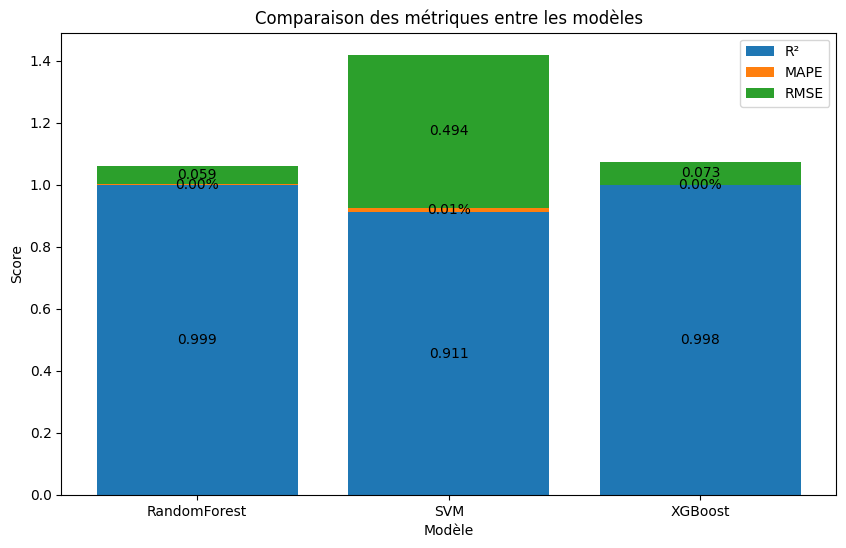

In [582]:
y_pred_test_rf = rfr_search.predict(X_test)
y_pred_test_svm = svm.predict(X_test)
y_pred_test_xgb = xgb_grid.predict(X_test)
# Exemple d'utilisation de la fonction
compare_metrics_1_bar(y_test, y_pred_test_rf, y_pred_test_svm, y_pred_test_xgb)


In [583]:
def compare_metrics(y_true, y_pred_rf, y_pred_svm, y_pred_xgb):
    # Calcul des métriques pour chaque modèle
    rmse_rf = math.sqrt(mean_squared_error(y_true, y_pred_rf))
    rmse_svm = math.sqrt(mean_squared_error(y_true, y_pred_svm))
    rmse_xgb = math.sqrt(mean_squared_error(y_true, y_pred_xgb))
    
    r2_rf = r2_score(y_true, y_pred_rf)
    r2_svm = r2_score(y_true, y_pred_svm)
    r2_xgb = r2_score(y_true, y_pred_xgb)
    
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    mape_svm = mean_absolute_percentage_error(y_true, y_pred_svm)
    mape_xgb = mean_absolute_percentage_error(y_true, y_pred_xgb)
    
    # Noms des modèles
    models = ['Random Forest', 'SVM', 'XGBoost']
    
    # Métriques
    rmse_scores = [rmse_rf, rmse_svm, rmse_xgb]
    r2_scores = [r2_rf, r2_svm, r2_xgb]
    mape_scores = [mape_rf, mape_svm, mape_xgb]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour le RMSE
    ax.bar(x - width, rmse_scores, width, label='RMSE')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


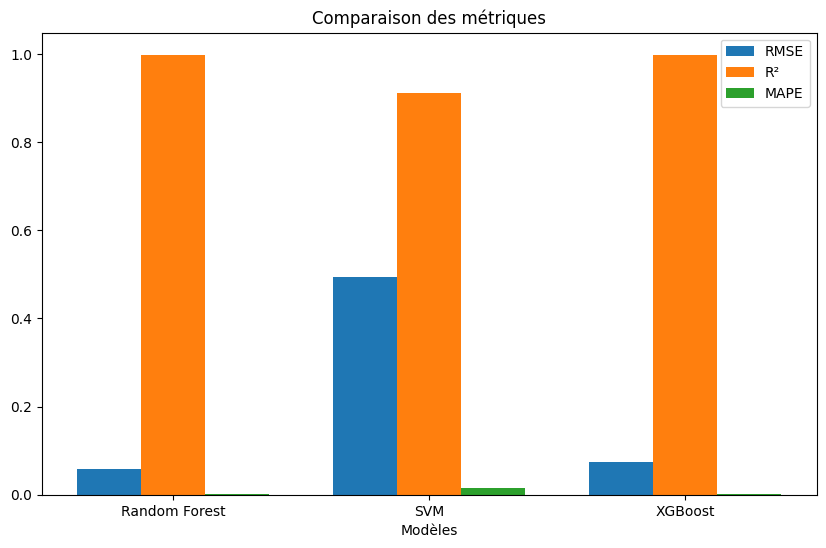

In [584]:
y_pred_test_rf = rfr_search.predict(X_test)
y_pred_test_svm = svm.predict(X_test)
y_pred_test_xgb = xgb_grid.predict(X_test)
# Exemple d'utilisation de la fonction
compare_metrics(y_test, y_pred_test_rf, y_pred_test_svm, y_pred_test_xgb)


La RMSE relative des meilleurs modèles est de 3,0 % (racine de l'erreur quadratique moyenne ramenée à la valeur à prédire), c'est une performance remarquable.

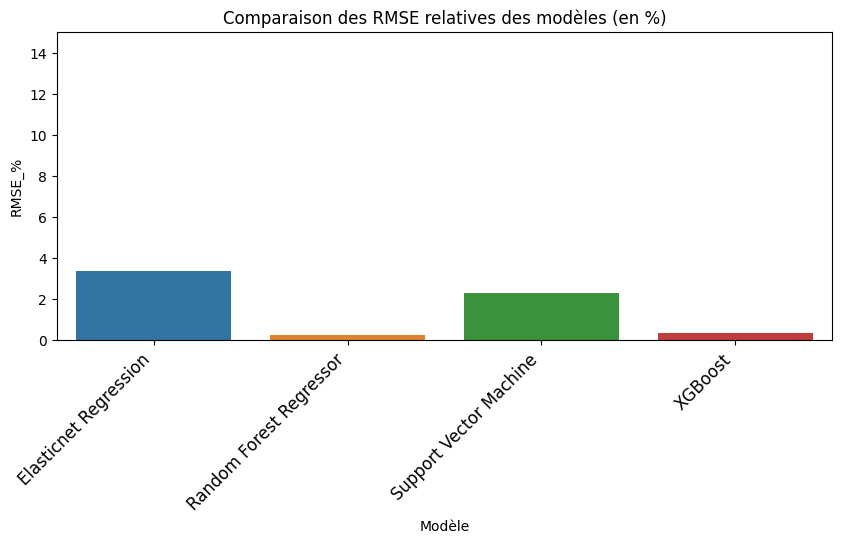

In [585]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x = results['Modèle'],
           y = results['RMSE_%']*100)
chart.set_xticklabels(labels = results['Modèle'], 
                      rotation=45,
                     horizontalalignment='right',
                     size=12,
                     )
ax = plt.gca()
ax.set_ylim([0, 15])
plt.show()

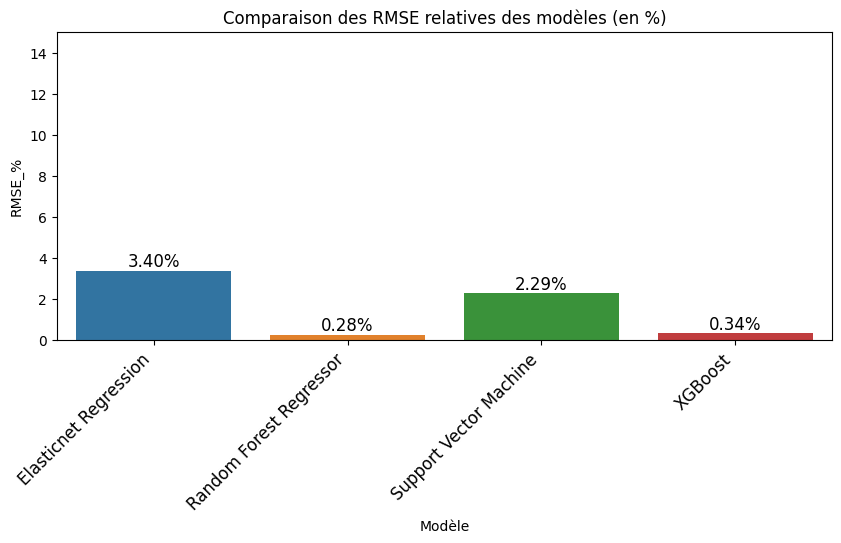

In [586]:
plt.figure(figsize=(10,4))
plt.title('Comparaison des RMSE relatives des modèles (en %)')
chart = sns.barplot(x=results['Modèle'], y=results['RMSE_%']*100)

# Ajouter les pourcentages au dessus de chaque barre
for i in range(len(results)):
    plt.text(x=i, y=results['RMSE_%'][i]*100+0.2, 
             s=f"{results['RMSE_%'][i]*100:.2f}%", 
             horizontalalignment='center', size=12)

chart.set_xticklabels(labels=results['Modèle'], rotation=45, 
                      horizontalalignment='right', size=12)
ax = plt.gca()
ax.set_ylim([0, 15])
plt.show()


Randon forect Regressor et XGBoost sont les modèles avec la plus faible RMSE, avec une valeur très proche.

Regardons quel algorithme est entraîné le plus rapidement et prédit le plus rapidement, pour voir lequel sélectionner pour les étapes suivantes

Comparaison avec la RMSE pour un estimateur donnant la valeur moyenne

In [587]:
math.sqrt(mean_squared_error(y_train.mean()*np.ones(y_test.shape[0]), y_test))

1.6579135328552634

In [588]:
rfr_search.best_estimator_

RandomForestRegressor()

le modèle Random Forest semble plus rapide à entraîner

In [589]:
list(dict_modeles.keys())

['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']

In [590]:
list(dict_modeles_new.keys())

['models\\Elastic Net.obj',
 'models\\Random Forest Regressor.obj',
 'models\\rfr_emissions.obj',
 'models\\SVM.obj',
 'models\\XGBoost.obj']

In [591]:
dict_modeles.update(dict_modeles_new)
print(dict_modeles)
list(dict_modeles.keys())

{'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.9, tol=0.001), 'Random Forest Regressor': RandomForestRegressor(), 'SVM': SVR(C=10, epsilon=0.01, gamma=0.01), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...), 'models\\Elastic Net.obj': ElasticNet(alpha=0.01, l1_ratio=0.9, tol=0.001), 'models\\Ran

['Elastic Net',
 'Random Forest Regressor',
 'SVM',
 'XGBoost',
 'models\\Elastic Net.obj',
 'models\\Random Forest Regressor.obj',
 'models\\rfr_emissions.obj',
 'models\\SVM.obj',
 'models\\XGBoost.obj']

In [592]:
print(y_test.dtypes)

float64


In [593]:
print(X_test)

        index  YearBuilt  NumberofBuildings  NumberofFloors  \
344 -0.723802 -1.054299   0.047876          -0.110920         
381 -0.667193  0.469558   0.047876          -0.512571         
351 -0.713509 -1.303092   0.047876           1.094031         
778  0.997123  1.091540   0.047876          -0.378687         
277 -0.817465 -1.831777   0.047876           0.290730         
667  0.636882 -0.183524   0.047876          -0.378687         
215 -0.905981  0.096368   0.047876          -0.512571         
465 -0.283278 -0.525614   0.047876          -0.378687         
86  -1.087131 -1.023200   0.047876           1.629565         
286 -0.807172 -1.023200  -4.139127          -0.110920         
770  0.976538 -1.645182  -4.139127          -0.244804         
67  -1.138595  1.309234   0.047876           0.558497         
218 -0.902894  0.127468   0.047876          -0.512571         
957  2.134458 -1.054299   0.047876          -0.378687         
583  0.171656  0.376261   0.047876          -0.512571  

In [594]:
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())

math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))

ValueError: X has 69 features, but SVR is expecting 71 features as input.

In [595]:
from sklearn.metrics import r2_score, mean_absolute_error


nom_modeles = ['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost']
liste_modeles = [dict_modeles['models\\Elastic Net.obj'],
                 dict_modeles['models\\Random Forest Regressor.obj'],
                 dict_modeles['models\\SVM.obj'],
                 dict_modeles['models\\XGBoost.obj']
                ]

comparaison_score = pd.DataFrame(index = nom_modeles, columns = ['RMSE', 'R2', 'RMSE_relative'])

for nom_modele, modele in zip(nom_modeles, liste_modeles):
    comparaison_score.loc[nom_modele, 'RMSE'] = math.sqrt(mean_squared_error(y_test, modele.predict(X_test)))
    comparaison_score.loc[nom_modele, 'R2'] = r2_score(y_test, modele.predict(X_test))

#normalisation RMSE
comparaison_score['RMSE_relative'] = comparaison_score['RMSE'].divide(comparaison_score['RMSE'].max())

In [596]:
comparaison_score

RMSE        R2 RMSE_relative
Elastic Net              0.73262   0.80473   1.0         
Random Forest Regressor  0.059372  0.998718  0.081041    
SVM                      0.493953  0.911233  0.674228    
XGBoost                  0.073428  0.998038  0.100226

In [597]:
# i=0
# for modele in liste_modeles:
#     print(nom_modeles[i], ': ')
#     i+=1
#     %timeit modele.predict(X_train)
#     print('')

In [598]:
# plt.title('Temps d\'exécution des algorithmes pour la prédiction \n(jeu d\'entrainement)')
# sns.barplot(x=nom_modeles,
#            y = [1.61, 95.5, 83, 10])
# ax = plt.gca()
# ax.set_yscale('log')

Elastic Net : 
2.42 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Random Forest Regressor : 
26.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

SVM : 
2.65 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

XGBoost : 
5.29 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)



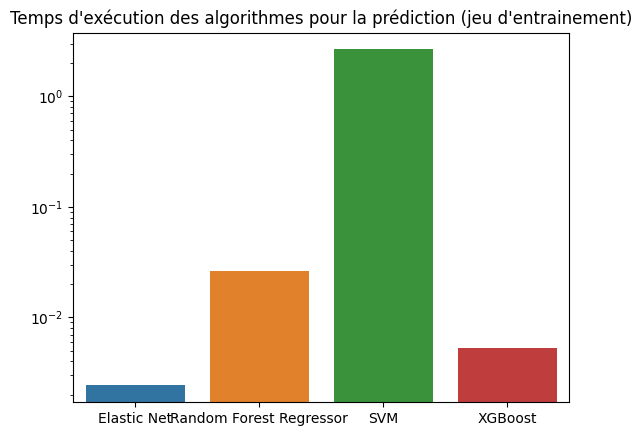

In [599]:
result = []
i = 0
for modele in liste_modeles:
    print(nom_modeles[i], ': ')
    i += 1
    time = %timeit -r 1 -n 1 -o modele.predict(X_train)
    result.append(time.best)
    print('')
plt.title('Temps d\'exécution des algorithmes pour la prédiction (jeu d\'entrainement)')
sns.barplot(x=nom_modeles, y=result)
ax = plt.gca()
ax.set_yscale('log')


le temps d'exécution de XGBoost est plus faible que celui de random forest, ce pourrait être un critère pour choisir éventuellement le XGBoost plutôt que le Random Forest Regressor (quite à dégrader légèrement la performance)

In [600]:
# comparaison_score_melt = pd.melt(comparaison_score.reset_index(), id_vars = ['index'], value_name = 'score', value_vars=['R2', 'RMSE_relative'])
# Réorganisation des données en utilisant la fonction melt pour avoir une structure tabulaire
comparaison_score_melt = pd.melt(comparaison_score.reset_index(), 
                                id_vars=['index'],                    # Variables à conserver telles quelles
                                value_name='score',                    # Nom de la colonne contenant les scores
                                value_vars=['R2', 'RMSE_relative'])     # Variables à transformer en colonne



Text(0.5, 1.0, 'Comparaison des performances des modèles (jeu de test)')

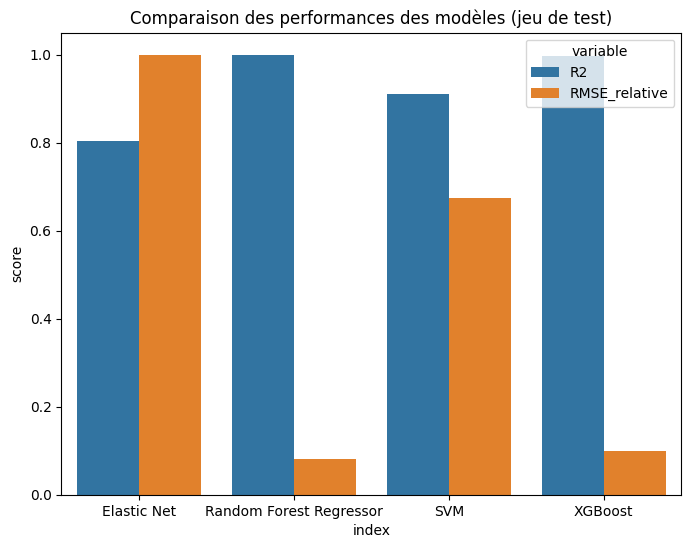

In [601]:
plt.figure(figsize=(8,6))
sns.barplot(x = comparaison_score_melt['index'],
            y = comparaison_score_melt['score'], hue = comparaison_score_melt['variable'])
plt.title('Comparaison des performances des modèles (jeu de test)')

Regardons avec un exemple ce que donne la prédiction

In [602]:
X_extrait = X_test
y_extrait = y_test

In [603]:
X_extrait.head()

index  YearBuilt  NumberofBuildings  NumberofFloors  \
344 -0.723802 -1.054299   0.047876          -0.110920         
381 -0.667193  0.469558   0.047876          -0.512571         
351 -0.713509 -1.303092   0.047876           1.094031         
778  0.997123  1.091540   0.047876          -0.378687         
277 -0.817465 -1.831777   0.047876           0.290730         

     PropertyGFAParking  PropertyGFABuilding(s)  \
344 -0.348151           -0.144694                 
381 -0.348151           -0.262685                 
351 -0.348151            0.559568                 
778 -0.348151           -0.513385                 
277 -0.348151            0.528569                 

     SecondLargestPropertyUseTypeGFA  SiteEUI(kBtu/sf)  SiteEnergyUse(kBtu)  \
344 -0.412557                         0.769871          0.232999              
381 -0.246364                        -0.868095         -0.564278              
351 -0.141254                         0.967621          1.413038              
778 -0.261683                         0.282959         -0.495650              
277 -0.403847                        -0.209550          0.389039              

     SteamUse(kBtu)  Electricity(kWh)  NaturalGas(kBtu)  \
344 -0.163813        0.312473         -0.043926           
381 -0.163813       -0.529651         -0.343292           
351 -0.163813        1.835665         -0.529131           
778 -0.163813       -0.394072         -0.529131           
277 -0.163813        0.639425         -0.529131           

     GHGEmissionsIntensity  SteamUse(percent)  Electricity(percent)  \
344  0.079662              -0.222452           0.513342               
381 -0.529890              -0.222452          -0.535542               
351 -0.367775              -0.222452           1.031955               
778 -0.465044              -0.222452           1.031955               
277 -0.581766              -0.222452           1.031955               

     NaturalGas(percent)  x0_Distribution Center  x0_Hospital  x0_Hotel  \
344 -0.440904             0                       0            0          
381  0.615191             0                       0            0          
351 -0.963083             0                       0            0          
778 -0.963083             0                       0            0          
277 -0.963083             0                       0            0          

     x0_K-12 School  x0_Large Office  x0_Low-Rise Multifamily  \
344  0               0                0                         
381  0               0                0                         
351  0               1                0                         
778  0               0                0                         
277  0               1                0                         

     x0_Medical Office  x0_Mixed Use Property  x0_Office  x0_Other  \
344  0                  0                      0          0          
381  0                  0                      0          0          
351  0                  0                      0          0          
778  0                  0                      0          0          
277  0                  0                      0          0          

     x0_Refrigerated Warehouse  x0_Residence Hall  x0_Retail Store  \
344  0                          0                  1                 
381  0                          0                  0                 
351  0                          0                  0                 
778  0                          0                  1                 
277  0                          0                  0                 

     x0_Senior Care Community  x0_Small- and Mid-Sized Office  \
344  0                         0                                
381  0                         0                                
351  0                         0                                
778  0                         0                                
277  0                         0                        

In [604]:
y_extrait.head()

344    22.985317
381    20.155046
351    24.182259
778    20.656617
277    23.212954
Name: Log2-SiteEnergyUseWN(kBtu), dtype: float64

In [605]:
prediction = dict_modeles['Random Forest Regressor'].predict(X_extrait)

Ramenons la prédiction à l'unité qu'on cherche à prédire (inverse du log2(y+1) soit exp2(y)-1

In [606]:
pd.DataFrame(prediction).isna().sum()

0    0
dtype: int64

In [607]:
type(y_extrait)

pandas.core.series.Series

In [608]:
predictions = pd.DataFrame([y_extrait, 
                            pd.Series(prediction, index = y_extrait.index),
                           np.exp2(y_extrait)-1,
                           np.exp2(pd.Series(prediction, index = y_extrait.index))-1]).T
predictions.columns = ['y_log', 'y_predict_log', 'y','y_predict']
# predictions.columns = [ 'y','y_predict','y_log', 'y_predict_log']

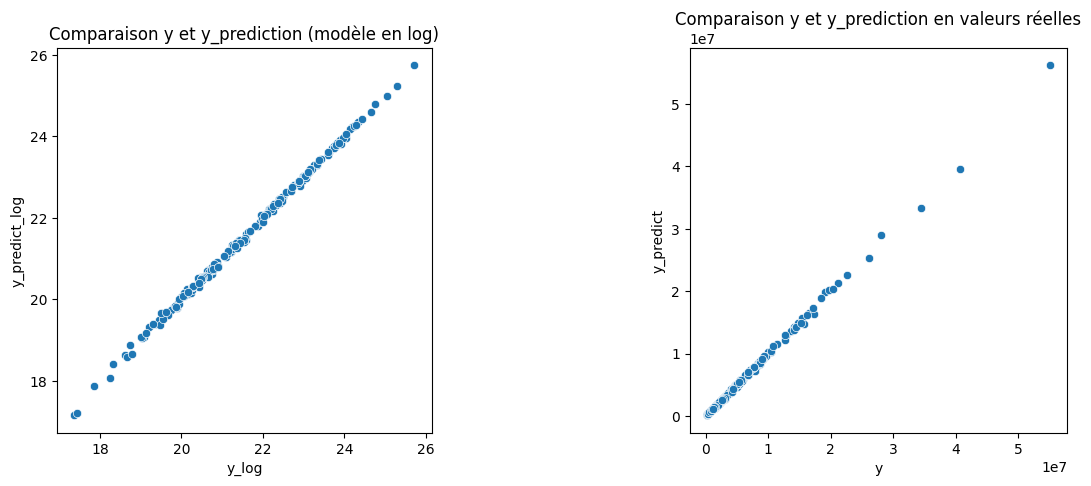

In [609]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.scatterplot(x = predictions['y_log'],
               y = predictions['y_predict_log'],
               ax = ax1)
sns.scatterplot(x = predictions['y'],
               y = predictions['y_predict'],
               ax=ax2)
ax1.set_aspect('equal', 'box')

ax2.set_aspect('equal', 'box')

ax1.title.set_text('Comparaison y et y_prediction (modèle en log)')
ax2.title.set_text('Comparaison y et y_prediction en valeurs réelles')
# ax2.title.set_text('Comparaison y et y_prediction (modèle en log)')
# ax1.title.set_text('Comparaison y et y_prediction en valeurs réelles')


# Pertinence des variables

## Permutations des variables

Les permutations aléatoires sont utilisées pour mélanger les données, évaluer les performances des modèles de manière impartiale

Afin de voir si toutes les features ont de l'influence sur nos resultats, essayons de voir l'influence sur notre métrique dans le cas de permutations des features et d'application de notre modèle de prédiction.

3 fonctions ont été testées. La dernière (permutation finale) est la plus pertinente.

Updates:
- permutation par ligne dans le one hot encoding (et non par colonne)
- utilisation du jeu de validation et non le jeu de  test
- mean squared error comme metrics
- cross validation à 3

In [610]:
X_train.shape

(769, 69)

In [611]:
X_test.shape

(193, 69)

- Les importations nécessaires sont effectuées, y compris le filtrage des avertissements futurs.
- Une liste vide text_columns est créée pour stocker les noms des colonnes correspondant aux vraies features avant la transformation One-Hot Encoding (OHE).
- Les préfixes des colonnes liées à l'application de l'OHE sont stockés dans une liste prefixes, et les indices des colonnes sont stockés dans la liste index_cols.
- Un dictionnaire dict_OHE est créé pour associer chaque préfixe à une liste de colonnes correspondantes.
- Les noms des colonnes correspondant aux vraies features sont ajoutés à la liste text_columns, et leurs indices sont ajoutés à la liste index_cols.
- Les données sont divisées en ensembles d'entraînement et de validation à l'aide de la fonction train_test_split.
- Une boucle est effectuée pour chaque feature.
- Un modèle de régression aléatoire est créé.
- Pour chaque feature, une permutation est effectuée sur les colonnes correspondantes en utilisant la fonction np.random.permutation.
- Le modèle est entraîné sur les données permises, et le score est calculé à l'aide de la validation croisée.
- La feature ayant le score RMSE le plus élevé est identifiée et supprimée.
- Les informations sur la feature supprimée et son score sont affichées.
- Les index des colonnes à supprimer sont identifiés et mis à jour.
- Les colonnes correspondantes sont supprimées des ensembles d'entraînement et de validation.
- La boucle se répète jusqu'à ce que toutes les features aient été évaluées.
- Un DataFrame features_score est créé pour stocker les noms des features et leurs scores RMSE.
- Les informations sur les features supprimées et les colonnes correspondantes sont affichées.

Le code suivant, permet de déterminer l'importance de chaque feature dans un modèle en effectuant des permutations sur les colonnes et en évaluant l'impact sur le score RMSE. Cela permet d'identifier les features les moins importantes et de les supprimer pour améliorer la performance du modèle.


In [500]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

def evaluate_variable_importance(X, y, model):
    # Diviser les données en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entraîner le modèle sur l'ensemble d'apprentissage
    model.fit(X_train, y_train)
    
    # Évaluer l'importance des variables par permutation
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    # Récupérer les scores d'importance des variables
    importance_scores = result.importances_mean
    
    # Récupérer les colonnes dans l'ordre d'importance décroissante
    sorted_columns = [col for _, col in sorted(zip(importance_scores, X.columns), reverse=True)]
    
    # Afficher les colonnes dans l'ordre d'importance décroissante
    print("Importance des variables :")
    for col in sorted_columns:
        print(col)
    
    # Effectuer des tests statistiques en créant des distributions nulles
    print("\nTests statistiques - Distributions nulles :")
    for col in sorted_columns:
        permuted_X = X.copy()
        permuted_X[col] = np.random.permutation(permuted_X[col])
        permuted_result = permutation_importance(model, permuted_X, y, n_repeats=10, random_state=42)
        p_value = (permuted_result.importances_mean > importance_scores[sorted_columns.index(col)]).mean()
        print(f"{col}: p-value = {p_value:.4f}")


In [503]:
data.dtypes

index                              int64  
PrimaryPropertyType                object 
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
SiteEUI(kBtu/sf)                   float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
NaturalGas(kBtu)                   float64
GHGEmissionsIntensity              float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUseWN(kBtu)         float64
dtype: object

In [505]:
# data_encoded = data.copy()
# from sklearn.preprocessing import OneHotEncoder

# # Supposons que ton DataFrame s'appelle "data" contenant toutes les colonnes
# # Tu peux remplacer "data" par le nom de ton DataFrame

# # Sélectionner les colonnes catégorielles
# X_categorical = data.select_dtypes(include='object')  # Sélectionne toutes les colonnes de type 'object'

# # Sélectionner les colonnes numériques
# X_numerical = data.select_dtypes(include=['int64', 'float64'])  # Sélectionne toutes les colonnes de type 'int' et 'float'

# # # Exemple d'utilisation de la fonction
# # X_categorical = data[['colonne_catégorielle_1', 'colonne_catégorielle_2']]  # Colonnes catégorielles à encoder
# # X_numerical = data.drop(["SiteEnergyUseWN(kBtu)", 'colonne_catégorielle_1', 'colonne_catégorielle_2'], axis=1)  # Colonnes numériques

# # Encoder les colonnes catégorielles avec l'encodage one-hot
# encoder = OneHotEncoder()
# X_categorical_encoded = encoder.fit_transform(X_categorical)

# import pandas as pd
# from scipy.sparse import csr_matrix

# # Supposons que tu as déjà encodé les colonnes catégorielles avec OneHotEncoder et obtenu une matrice creuse nommée "X_categorical_encoded"
# # Supposons également que tu as une DataFrame pour les colonnes numériques nommée "X_numerical"

# # Convertir la matrice creuse en DataFrame
# X_categorical_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_categorical_encoded)

# # Fusionner les colonnes catégorielles encodées (DataFrame) et les colonnes numériques (DataFrame)
# X = pd.concat([X_categorical_encoded_df, X_numerical], axis=1)
# y = data["SiteEnergyUseWN(kBtu)"]  # Variable cible

# # # Fusionner les colonnes catégorielles encodées et les colonnes numériques
# # X = pd.concat([X_categorical_encoded, X_numerical], axis=1)
# # y = data["SiteEnergyUseWN(kBtu)"]  # Variable cible

# for nom_modele, modele in zip(nom_modeles, liste_modeles):
#     print(f"\nImportance des variables pour le modèle {nom_modele}:")
#     evaluate_variable_importance(X, y, modele)




Importance des variables pour le modèle Elastic Net:
Importance des variables :
SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu)
Electricity(kWh)
Log2-SiteEnergyUseWN(kBtu)
NumberofFloors
SiteEUI(kBtu/sf)
PropertyGFABuilding(s)
PropertyGFAParking
2
39
41
35
SteamUse(percent)
14
33
40
SteamUse(kBtu)
4
Electricity(percent)
38
16
49
NaturalGas(kBtu)
YearBuilt
GHGEmissionsIntensity
27
24
0
6
index
42
21
26
NaturalGas(percent)
22
34
52
18
30
13
47
32
10
37
15
29
51
45
8
28
44
36
9
5
1
19
25
11
3
31
46
20
17
43
48
12
7
SecondLargestPropertyUseTypeGFA
23
50
NumberofBuildings

Tests statistiques - Distributions nulles :
SiteEnergyUse(kBtu): p-value = 0.4648
SiteEnergyUseWN(kBtu): p-value = 0.4930
Electricity(kWh): p-value = 0.1549
Log2-SiteEnergyUseWN(kBtu): p-value = 0.8451
NumberofFloors: p-value = 0.2394
SiteEUI(kBtu/sf): p-value = 0.7606
PropertyGFABuilding(s): p-value = 0.3380
PropertyGFAParking: p-value = 1.0000
2: p-value = 0.7324
39: p-value = 0.8169
41: p-value = 0.5634
35: p-value = 0.9437

TypeError: '<' not supported between instances of 'int' and 'str'

In [612]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import cross_val_score

# Création d'un dictionnaire pour les colonnes créées par le OHE, pour les retrouver dans l'application des permutations
text_columns = []  # Les noms des colonnes qui correspondent à des vraies features (pré OHE)
prefixes = []  # Les préfixes des colonnes liées à l'application du OHE
index_cols = []  # Les indices des colonnes qui correspondent aux features pré OHE et à la première colonne de chaque feature du OHE
regex = re.compile(r'x\d_')

# Parcours des colonnes de X
for j, column in enumerate(X.columns):
    if regex.search(column):
        if column[:2] not in prefixes:
            prefixes.append(column[:2])
            index_cols.append(j)
    else:
        text_columns.append(column)
        index_cols.append(j)
        
dict_OHE = {}
# Parcours des préfixes
for prefix in prefixes:
    temp_list = []
    # Parcours des colonnes de X
    for column in X.columns:
        if prefix in column:
            temp_list.append(column)
    dict_OHE[prefix] = temp_list
    text_columns.append(prefix)

# Préparation du jeu de données
X_train_permut, X_validation_permut, y_train_permut, y_validation = train_test_split(X_train,
                                        y_train,
                                        test_size=0.2,
                                        random_state=42
                                        )

# Boucle sur le nombre de features
list_features = text_columns
features_score = pd.DataFrame({})
for num_feature in range(len(text_columns)):
    print('\nBoucle {}.'.format(num_feature+1))
    scores = []
    
    # Entraînement du modèle sur le jeu de données sans les éventuelles features supprimées
    model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, 
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=-1, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    
    # Pour chaque feature de X_test
    for j, feature in zip(index_cols, list_features):
        X_validation_temp = X_validation_permut.copy()
        
        # Si on identifie une feature en "X0_", on fait une permutation sur plusieurs colonnes
        if regex.search(X_validation_permut.iloc[:, j].name):
            prefixe = X_validation_permut.iloc[:, j].name[:2]
            for prefixe_col in dict_OHE[prefixe]:
                index_col = X_validation_permut.columns.get_loc(prefixe_col)
                X_columns_temp = X_validation_temp.iloc[:, index_col]
                X_validation_temp.iloc[:, index_col] = np.random.permutation(X_columns_temp.T).T
        # Sinon, on fait une permutation sur une seule colonne
        else:             
            X_validation_temp.iloc[:, j] = np.random.permutation(X_validation_temp.iloc[:, j])
        
        # Entraînement du modèle et ajout du score
        scores.append(cross_val_score(model, 
                                      X_validation_temp, 
                                      y_validation, 
                                      cv=3,
                                      scoring='neg_mean_squared_error',
                                      n_jobs=-1).mean())
        print('    j : {}, feature : {}, score : {}'.format(j, feature, scores[-1]))
    
    # Identification de la feature avec la RMSE la plus faible en valeur absolue
    feature_to_remove_index = scores.index(max(scores))
    
    # Stockage du nom de la feature et du score
    feature_name = X_train_permut.columns[index_cols[feature_to_remove_index]]
    print('feature name : ', feature_name)
    if regex.search(feature_name):
        feature_name = feature_name[:3]
        print('feature name : ', feature_name)
    
    features_score = pd.concat([features_score,
                                pd.DataFrame({'feature': feature_name,
                                              'RMSE': scores[feature_to_remove_index]
                                             }, index=[0])
                               ])
    # Affichage des informations
    print ('\nBoucle {}. Feature {} supprimée  : score = {}'.format(
        num_feature+1, 
        list_features[feature_to_remove_index],
        scores[feature_to_remove_index], 
        min(scores)))
    
    # Identification des numéros de colonne des features à supprimer
    if regex.search(feature_name):
        print('      indice colonne de base à supprimer : ', index_cols[feature_to_remove_index])
        print('      indice de la colonne correspondant à la prochaine feature OHE', index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]))
        liste_index = list(
            range(index_cols[feature_to_remove_index],
                  index_cols[feature_to_remove_index]+len(dict_OHE[feature_name[:2]]),
                  1)
        )
    else:
        liste_index = index_cols[feature_to_remove_index]
    
    # Mise à jour de la liste des features avec la feature en moins pour le prochain tour de boucle
    for k, indice in enumerate(index_cols):
        if index_cols.index(indice) > feature_to_remove_index:
            if type(liste_index) is int:
                index_cols[k] -= 1
            else:
                index_cols[k] -= len(liste_index)
    
    print('      index à supprimer ', liste_index)
    
    del list_features[feature_to_remove_index]
    if regex.search(feature_name):
        del dict_OHE[feature_name[:2]]
        
    del index_cols[feature_to_remove_index]
    
    print('      feature to remove index', liste_index)
    print('      Colonnes supprimées : ', X_train_permut.columns[liste_index])
    X_train_permut.drop(X_train_permut.columns[liste_index], axis=1, inplace=True)
    X_validation_permut.drop(X_validation_permut.columns[liste_index], axis=1, inplace=True)



Boucle 1.
    j : 0, feature : index, score : -0.2242167110404719
    j : 1, feature : YearBuilt, score : -0.22530749293775268
    j : 2, feature : NumberofBuildings, score : -0.23123744351689915
    j : 3, feature : NumberofFloors, score : -0.2448311654654718
    j : 4, feature : PropertyGFAParking, score : -0.23986350096214948
    j : 5, feature : PropertyGFABuilding(s), score : -0.2641351113842436
    j : 6, feature : SecondLargestPropertyUseTypeGFA, score : -0.23625038396533446
    j : 7, feature : SiteEUI(kBtu/sf), score : -0.2720659104313808
    j : 8, feature : SiteEnergyUse(kBtu), score : -0.377814196856453
    j : 9, feature : SteamUse(kBtu), score : -0.2383109295671085
    j : 10, feature : Electricity(kWh), score : -0.328611742894719
    j : 11, feature : NaturalGas(kBtu), score : -0.2560687143665786
    j : 12, feature : GHGEmissionsIntensity, score : -0.25385019440325524
    j : 13, feature : SteamUse(percent), score : -0.23437610245369786
    j : 14, feature : Electricit

    j : 10, feature : Electricity(percent), score : -0.18904395333087473
    j : 11, feature : NaturalGas(percent), score : -0.1924088936571591
    j : 12, feature : x0, score : -0.18449478964391527
    j : 30, feature : x2, score : -0.18880145051619382
    j : 41, feature : x3, score : -0.18969524301719523
feature name :  NumberofBuildings

Boucle 6. Feature NumberofBuildings supprimée  : score = -0.1786533320932507
      index à supprimer  0
      feature to remove index 0
      Colonnes supprimées :  NumberofBuildings

Boucle 7.
    j : 0, feature : NumberofFloors, score : -0.17726596909764636
    j : 1, feature : PropertyGFAParking, score : -0.18723196152480734
    j : 2, feature : PropertyGFABuilding(s), score : -0.21457169205261642
    j : 3, feature : SecondLargestPropertyUseTypeGFA, score : -0.1737885057124403
    j : 4, feature : SiteEUI(kBtu/sf), score : -0.20689987730520296
    j : 5, feature : SiteEnergyUse(kBtu), score : -0.32360408522741874
    j : 6, feature : Electricit

    j : 1, feature : SiteEUI(kBtu/sf), score : -0.14172140837015124
    j : 2, feature : SiteEnergyUse(kBtu), score : -0.25436302529297067
    j : 3, feature : Electricity(kWh), score : -0.21516911086553092
    j : 4, feature : NaturalGas(kBtu), score : -0.15879425836579117
    j : 5, feature : GHGEmissionsIntensity, score : -0.14116329218778878
    j : 6, feature : x0, score : -0.15411025846062698
feature name :  GHGEmissionsIntensity

Boucle 14. Feature GHGEmissionsIntensity supprimée  : score = -0.14116329218778878
      index à supprimer  5
      feature to remove index 5
      Colonnes supprimées :  GHGEmissionsIntensity

Boucle 15.
    j : 0, feature : PropertyGFABuilding(s), score : -0.1559822502531663
    j : 1, feature : SiteEUI(kBtu/sf), score : -0.1686838309387754
    j : 2, feature : SiteEnergyUse(kBtu), score : -0.2667704742169191
    j : 3, feature : Electricity(kWh), score : -0.21294744132423649
    j : 4, feature : NaturalGas(kBtu), score : -0.1662033830245654
    j : 5

In [614]:
features_score

feature      RMSE
0  index                           -0.224217
0  SteamUse(percent)               -0.214829
0  YearBuilt                       -0.214659
0  SteamUse(kBtu)                  -0.203345
0  x1_                             -0.196325
0  NumberofBuildings               -0.178653
0  SecondLargestPropertyUseTypeGFA -0.173789
0  NaturalGas(percent)             -0.172823
0  x2_                             -0.166497
0  Electricity(percent)            -0.143934
0  PropertyGFAParking              -0.139637
0  NumberofFloors                  -0.144938
0  x3_                             -0.142218
0  GHGEmissionsIntensity           -0.141163
0  x0_                             -0.141280
0  PropertyGFABuilding(s)          -0.055880
0  SiteEUI(kBtu/sf)                -0.032579
0  NaturalGas(kBtu)                -0.130339
0  Electricity(kWh)                -0.132156
0  SiteEnergyUse(kBtu)             -4.228273

In [615]:
graphe_features = features_score.reset_index().drop(['index'], axis=1).reset_index()
graphe_features['index'] +=1
graphe_features['RMSE'] = (abs(graphe_features['RMSE'])).apply(math.sqrt)

In [625]:
# import seaborn as sns
# plt.figure(figsize=(15,5))
# plt.title('Evolution du score en supprimant des features par permutation')
# sns.lineplot( x = graphe_features['index'].values,
#             y = graphe_features["RMSE"])
# sns.lineplot([1,graphe_features.shape[0]],[graphe_features.iloc[0,2], graphe_features.iloc[0,2]])
# plt.xlabel('Nombre de features supprimées')
# plt.ylabel('Score : RMSE')
# plt.legend(['Score avec suppression des features',
#            'Score de référence'])
# ax = plt.gca()

# plt.show()

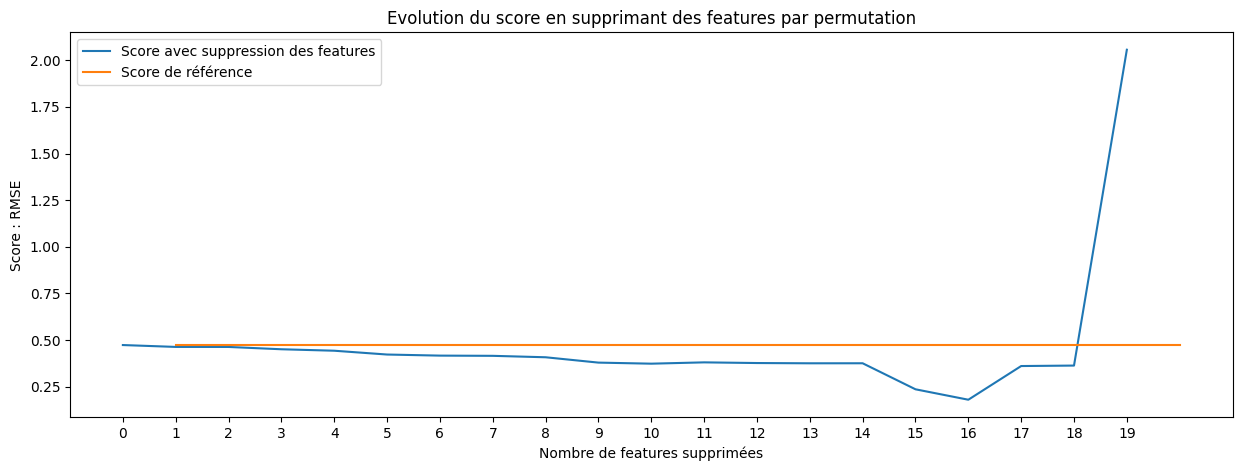

In [624]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.title('Evolution du score en supprimant des features par permutation')
sns.lineplot(x=graphe_features.index, y=graphe_features["RMSE"])
sns.lineplot([1, graphe_features.shape[0]], [graphe_features.iloc[0, 2], graphe_features.iloc[0, 2]])
plt.xlabel('Nombre de features supprimées')
plt.ylabel('Score : RMSE')
plt.legend(['Score avec suppression des features', 'Score de référence'])
ax = plt.gca()

# Afficher les valeurs de X de 1 en 1
plt.xticks(graphe_features.index[::1])

plt.show()


Observations :
* On peut supprimer 18 features en améliorant un peu le modèle.


In [626]:
graphe_features['feature'].replace({
    'x0_' : 'BuildingType', 
    'x1_' : 'PrimaryPropertyType',
    'x2_' : 'Neighborhood',
    'x3_' : 'LargestPropertyUseType',
    'x4_' : 'SecondLargestPropertyUseType',
    'x5_' : 'ThirdLargestPropertyUseType', 
    'x6_' : 'Outlier'
}, inplace=True)

Le graphe ci-dessus peut être également affiché sous la façon suivante, en affichant le nom des features identifier leur importance relative

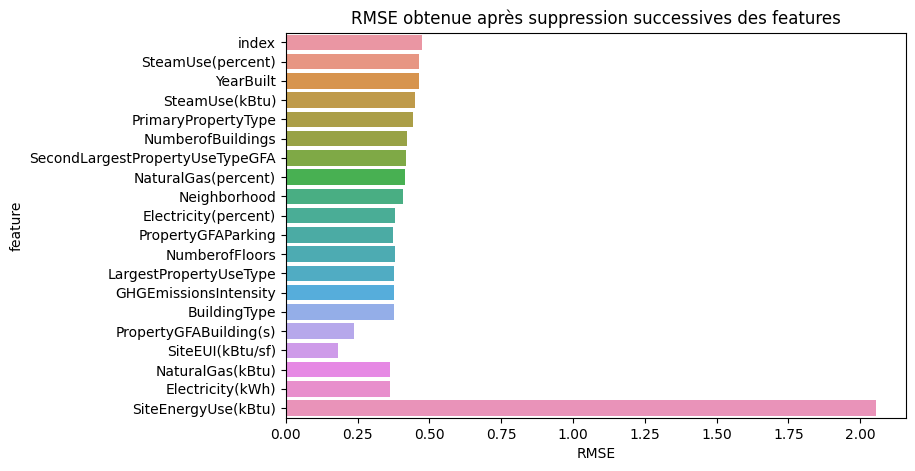

In [627]:
plt.figure(figsize=(8,5))
plt.title('RMSE obtenue après suppression successives des features')
sns.barplot(x = graphe_features['RMSE'],
           y = graphe_features['feature'])
plt.show()

### Bilan des permutations

Les résultats obtenus ci-dessus sont assez cohérents avec l'enjeu de la 
* les 2 features les plus significatives sont la surface dédiée à l'usage principal du bâtiment et son usage principal.
* La latitude a plus d'importance que la longitude. C'est peut être lié à la configuration de la ville, dont la distance nord sud est plus importante que la distance est-ouest (voir représentation cartographique dans l'analyse de données).
* certaines features sont d'importance moyenne : type de bâtiment, nombre de bâtiments, nombre d'étages 3ème type d'usage. 

Pour simplifier la collecte de données, on pourrait éventuellement réduire notre jeu de données aux features suivantes avec une dégradation minimale du score :
* LargestPropertyUseTypeGFA
* LargestPropertyUseType
* Numberoffloors
* Latitude
* Building Type

On ourrait aussi légèrement améliorer le modèle en supprimant les 5 features suivantes du jeu de données: 
* ThirdLargestPropertyUseType
* Longitude
* PrimaryPropertyType

## Méthode Ascendante

Contraire de la méthode par permutation : à chaque tour de boucle, on teste l'ajout d'une feature et on garde la feature qui améliore le plus le score. On boucle sur toutes les features jusqu'à toutes les avoir intégrées 

sur le principe la méthode fonctionne mais il faurait la reprendre avec les mêmes mises mise à jour que les permutations : cross validation et sélection par lot de features du one hot encoding

In [118]:
'''import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Boucle i sur le nombre de features:
    #boucle j sur le nombre de features:
        #fit du modèle avec i+1 features (feature pré sélectionnées + chaque feature 1 à 1) sur jeu de training
        #calcul du score sur jeu de test
    #on garde la feature j avec le plus petit score
    
#variables
X_train_ascend = pd.DataFrame(np.ones(X_train.shape[0]))
X_test_ascend = pd.DataFrame(np.ones(X_test.shape[0]))

#choix du modèle utilisé : 

#model = xgb_grid.best_estimator_
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

#définition des paramètres
list_features = list(range(X_test.shape[1])) #liste d'entiers
features_score_asc = []
features_kept = []
features_score = []

for i in list_features:
    scores = []
    features_left = list(set(list_features) - set(features_kept)) # liste d'entiers 
    print('features_left', len(features_left))
    for j in features_left:
        #on entraine le modèle avec la feature supplémentaire
        #print('X_train_ascend : ',X_train_ascend.shape)
        #print('X_train ', X_train.shape)
        #print('X_train.iloc[:,j] ', X_train.iloc[:,j].shape)
        #print('y_train ', y_train.shape)
        #print('concat : ', pd.concat([X_train_ascend,pd.DataFrame(X_train.iloc[:,j]).reset_index(drop=True)],axis=1).shape)
        
        
        model.fit(
            pd.concat(
                [X_train_ascend,
                 pd.DataFrame(X_train.copy().iloc[:,j]).reset_index(drop=True)
                ],axis=1),
            y_train)
        
        #on enregistre le score de ce modèle
        scores.append(
            math.sqrt(
                mean_squared_error(
                    model.predict(
                        pd.concat([X_test_ascend,
                                   pd.DataFrame(X_test.iloc[:,j]).reset_index(drop=True)
                                  ],axis=1)),
                    y_test)
            )
        )
        
        
    #sauvegarde de la feature et de son score
    features_score_asc.append(min(scores))
    feature_kept_index = scores.index(min(scores))
    features_kept.append(features_left[feature_kept_index]) #on enregistre la feature dans feature kept
    
    #mise à jour du jeu de données avec la feature supplémentaire
    X_train_ascend = pd.concat([X_train_ascend, 
                                pd.DataFrame(X_train.iloc[:, features_left[feature_kept_index]
                                                         ]).reset_index(drop=True)], axis=1)
    X_test_ascend  = pd.concat([X_test_ascend,
                                pd.DataFrame(X_test.iloc[:,  features_left[feature_kept_index]
                                                        ]).reset_index(drop=True)], axis=1)
    
    print('Tour {}. Feature ajoutée : {}. Score : {}'.format(i+1, features_kept[-1], features_score_asc[-1]))

asc_score = pd.DataFrame({'Feature' : features_kept,
                          'Score' : features_score_asc})'''

"import warnings\nwarnings.simplefilter(action='ignore', category=FutureWarning)\n\n#Boucle i sur le nombre de features:\n    #boucle j sur le nombre de features:\n        #fit du modèle avec i+1 features (feature pré sélectionnées + chaque feature 1 à 1) sur jeu de training\n        #calcul du score sur jeu de test\n    #on garde la feature j avec le plus petit score\n    \n#variables\nX_train_ascend = pd.DataFrame(np.ones(X_train.shape[0]))\nX_test_ascend = pd.DataFrame(np.ones(X_test.shape[0]))\n\n#choix du modèle utilisé : \n\n#model = xgb_grid.best_estimator_\nmodel = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=1, gamma=0,\n             importance_type='gain', learning_rate=0.1, max_delta_step=0,\n             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,\n             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,\n             reg_alpha=0, reg_lambda=1, scale_pos_weig

# Intérêt du Energy Star Score

Entrainons un nouveau modèle avec le Energy Star Score

In [811]:
X_en = X.copy()

In [812]:
X_en['energy_star_score'] = energy_star_score

In [813]:
y_en = y['Log2-SiteEnergyUseWN(kBtu)'].copy()
y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)
# y_en = y['SiteEnergyUseWN(kBtu)'].copy()
# y_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [814]:
X_en.drop(X_en[X_en['energy_star_score'].isna()].index, inplace=True)

In [815]:
from sklearn.model_selection import train_test_split
X_en_train, X_en_test, y_en_train, y_en_test = \
                        train_test_split(X_en, 
                                         y_en,  
                                         test_size = 0.2, 
                                         random_state = 42
                                        )


In [816]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.9s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [817]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test))

0.059822274377616044

In [818]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)

rmse = math.sqrt(mean_squared_error(y_en_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_en_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_en_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_en_test, y_pred_test)) / y_en_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_en_test) & (y_pred_test <= 1.1 * y_en_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.059822274377616044
MAPE(log): 0.0021307501677155136
R²(log): 0.9986980203334488
MPSE : 0.2772218440418186
Taux de prédictions entre 90% et 110% : 100.0


In [819]:
# Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)
y_pred_test_rfe = y_pred_test
rmse_e = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse_e)

# Calcul du MAP
map_score_e = mean_absolute_percentage_error(np.exp2(y_en_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score_e)

# Calcul du R²
r2_e = r2_score(np.exp2(y_en_test), np.exp2(y_pred_test))
print("R² (exp) :", r2_e)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse_e = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test))) / np.exp2(y_en_test.mean()) * 100
print("MPSE (exp) :", mpse_e)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range_e = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% (exp) :", predictions_within_range_e)

RMSE (exp): 274103.18679796084
MAPE (exp) : 0.03064534214488591
R² (exp) : 0.9985968986728364
MPSE (exp) : 8.748339432658971
Taux de prédictions entre 90% et 110% (exp) : 97.92746113989638


Entrainons un autre modèle avec les mêmes données sans le Energy Star Score

In [820]:
X_en_train.drop(['energy_star_score'], axis=1, inplace=True)
X_en_test.drop(['energy_star_score'], axis=1, inplace=True)

In [821]:
model_en = GridSearchCV(RandomForestRegressor(),
                               param_grid = parameters,
                               #scoring='mean_squared_error',
                              verbose=2,
                               cv=5)

model_en.fit(X_en_train, y_en_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.3s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   1.4s
[CV] END max_

[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.5s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.1s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.5s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; tot

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.6s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500]},
             verbose=2)

In [822]:
math.sqrt(mean_squared_error(model_en.predict(X_en_test), y_en_test)) 

0.05948569340961609

In [823]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 # Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)
rmse = math.sqrt(mean_squared_error(y_en_test, y_pred_test))
print("RMSE(log):", rmse)

# Calcul du MAPE
map_score = mean_absolute_percentage_error(y_en_test, y_pred_test)
print("MAPE(log):", map_score)

# Calcul du R²
r2 = r2_score(y_en_test, y_pred_test)
print("R²(log):", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(y_en_test, y_pred_test)) / y_en_test.mean() * 100
print("MPSE :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((y_pred_test >= 0.9 * y_en_test) & (y_pred_test <= 1.1 * y_en_test)).mean() * 100
print("Taux de prédictions entre 90% et 110% :", predictions_within_range) 

RMSE(log): 0.05948569340961609
MAPE(log): 0.0021581910252371117
R²(log): 0.9987126299011176
MPSE : 0.2756620973155517
Taux de prédictions entre 90% et 110% : 100.0


In [824]:
# Calcul du RMSE
y_pred_test = model_en.predict(X_en_test)
y_pred_test_rf = y_pred_test
rmse = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test)))
print("RMSE (exp):", rmse)

# Calcul du MAP
map_score = mean_absolute_percentage_error(np.exp2(y_en_test), np.exp2(y_pred_test))
print("MAPE (exp) :", map_score)

# Calcul du R²
r2 = r2_score(np.exp2(y_en_test), np.exp2(y_pred_test))
print("R² (exp) :", r2)

# Calcul de l'erreur quadratique moyenne en pourcentage (MPSE)
mpse = math.sqrt(mean_squared_error(np.exp2(y_en_test), np.exp2(y_pred_test))) / np.exp2(y_en_test.mean()) * 100
print("MPSE (exp) :", mpse)

# Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
predictions_within_range = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
print("Taux de prédictions entre 90% et 110% (exp) :", predictions_within_range)



RMSE (exp): 291577.65117325546
MAPE (exp) : 0.031167426168141558
R² (exp) : 0.9984122967560695
MPSE (exp) : 9.30605839807788
Taux de prédictions entre 90% et 110% (exp) : 97.40932642487047


## Metrique avec Energie score :
- RMSE (exp): 287584.9522929458
- MAPE (exp) : 0.031194994413070238
- R² (exp) : 0.9984554812600384
- MPSE (exp) : 9.178626515707638
- Taux de prédictions entre 90% et 110% (exp) : 97.92746113989638

## Metrique sans Energie Score
- RMSE (exp): 276078.14772999316
- MAPE (exp) : 0.030667592834532364
- R² (exp) : 0.998576606655381
- MPSE (exp) : 8.811372733371359
- Taux de prédictions entre 90% et 110% (exp) : 97.92746113989638

Le résultat obtenu ici avec le Energy Star Score est bien moins bon que le modèle initial, où on avait davantage de données (1500 obsevations supplémentaires). On voit cependant qu'à iso échantillon, le Energy Star Score améliore très légèrement la performance et semble donc pertinent . Cependant, dans la mesure où:
* il est manquant pour un certain nombre de données de l'échantillon (et donc potentiellement des futurs bâtiments pour lesquels il faudra faire tourner le modèle)
* il est fastidieux à calculer

On peut tout à fait se passer du Energy Star Score au prix d'un modèle légèrement moins précis (cf parties précédentes du notebook) mais avec une complexité moindre pour l'ensemble du processus. Dans le cas où les équipes parviendraient à estimer de façon simple le Energy Star Score, la question serait à reconsidérer et il serait alors pertinent de l'intégrer au modèle

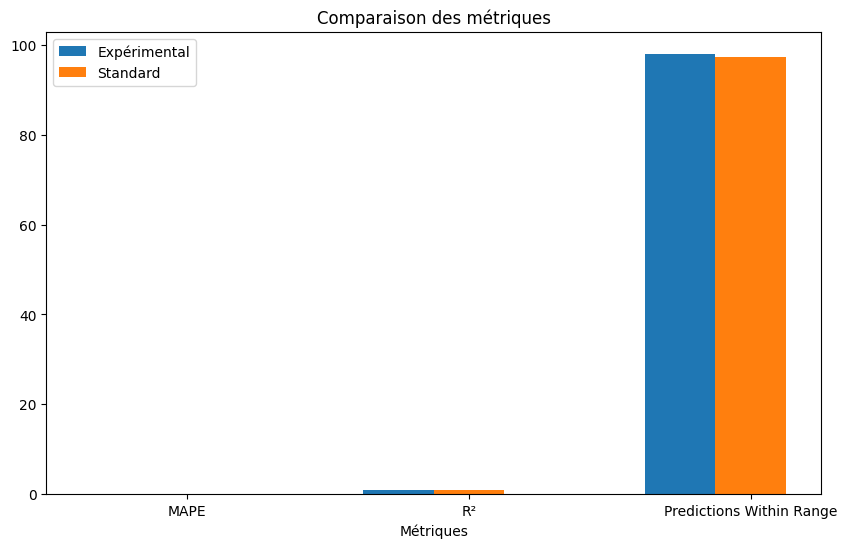

In [825]:
import matplotlib.pyplot as plt
import numpy as np

def compare_metrics_final(metrics_exp, metrics):
    # Noms des métriques
    metrics_names = ['MAPE', 'R²', 'Predictions Within Range']
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(metrics_exp))
    width = 0.25
    
    # Barres pour les métriques expérimentales
    ax.bar(x - width, metrics_exp, width, label='Expérimental')
    # Barres pour les métriques standard
    ax.bar(x, metrics, width, label='Standard')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names)
    ax.set_xlabel('Métriques')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()

# Exemple d'utilisation de la fonction avec des données
metrics_exp = [map_score_e, r2_e, predictions_within_range_e]
metrics = [map_score, r2, predictions_within_range]

# Appel de la fonction pour comparer les métriques
compare_metrics_final(metrics_exp, metrics)


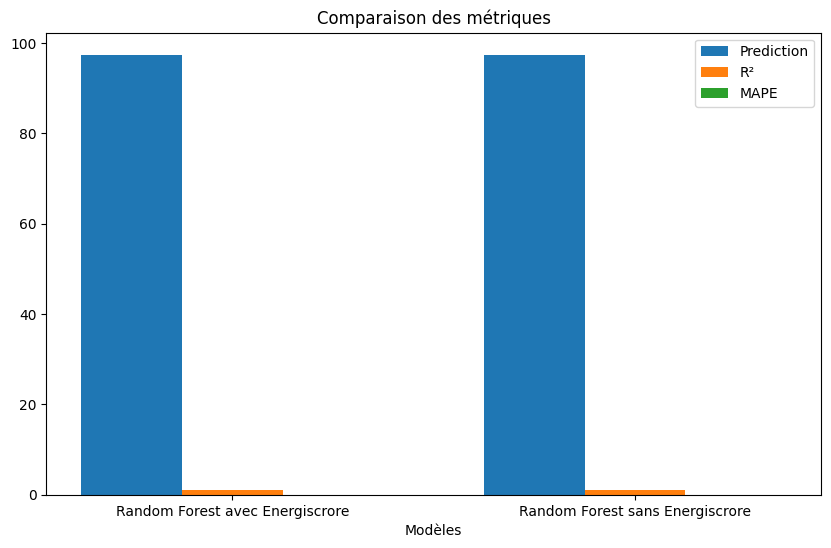

In [826]:
def compare_metrics(y_true, y_pred_rfe,  y_pred_rf):
    # Calcul des métriques pour chaque modèle
    
    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    prediction_rfe = ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 
    prediction_rf= ((np.exp2(y_pred_test) >= 0.9 * np.exp2(y_en_test)) & (np.exp2(y_pred_test) <= 1.1 * np.exp2(y_en_test))).mean() * 100 

    r2_rfe = r2_score(y_true, y_pred_rfe)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    mape_rfe = mean_absolute_percentage_error(y_true, y_pred_rfe)
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    
    # Noms des modèles
    models = ['Random Forest avec Energiscrore', 'Random Forest sans Energiscrore']
    
    # Métriques
    prediction_scores = [prediction_rfe, prediction_rf]
    r2_scores = [r2_rfe, r2_rf]
    mape_scores = [mape_rfe,mape_rf]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour le RMSE
    ax.bar(x - width, prediction_scores, width, label='Prediction')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE')
    
    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


# y_pred_test_rf = rfr_search.predict(X_test)

# Exemple d'utilisation de la fonction
compare_metrics(y_en_test, y_pred_test_rfe, y_pred_test_rf)


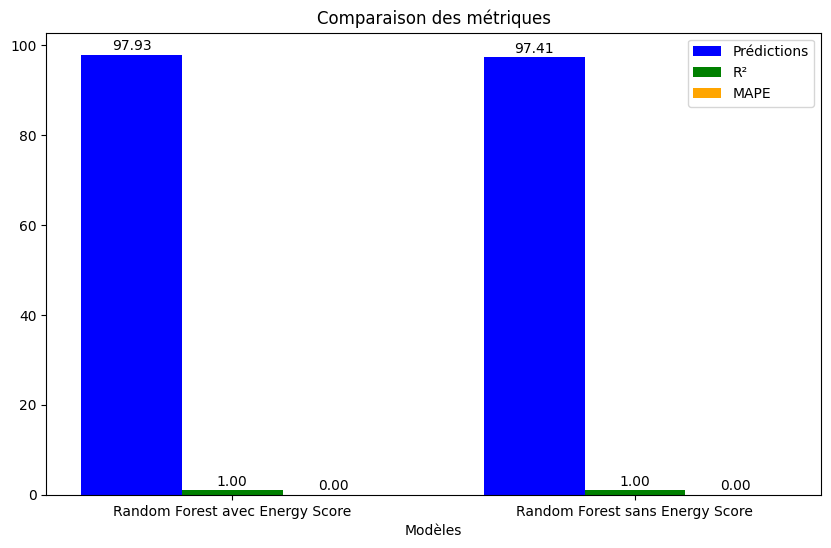

In [827]:
import matplotlib.pyplot as plt
import numpy as np

def compare_metrics(y_true, y_pred_rfe, y_pred_rf):
    # Calcul des métriques pour chaque modèle
    
    # Calcul du taux de prédictions entre 90% et 110% de la valeur réelle
    prediction_rfe = ((np.exp2(y_pred_rfe) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_rfe) <= 1.1 * np.exp2(y_true))).mean() * 100 
    prediction_rf = ((np.exp2(y_pred_rf) >= 0.9 * np.exp2(y_true)) & (np.exp2(y_pred_rf) <= 1.1 * np.exp2(y_true))).mean() * 100 

    r2_rfe = r2_score(y_true, y_pred_rfe)
    r2_rf = r2_score(y_true, y_pred_rf)
    
    mape_rfe = mean_absolute_percentage_error(y_true, y_pred_rfe)
    mape_rf = mean_absolute_percentage_error(y_true, y_pred_rf)
    
    # Noms des modèles
    models = ['Random Forest avec Energy Score', 'Random Forest sans Energy Score']
    
    # Métriques
    prediction_scores = [prediction_rfe, prediction_rf]
    r2_scores = [r2_rfe, r2_rf]
    mape_scores = [mape_rfe, mape_rf]
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models))
    width = 0.25
    
    # Barres pour les prédictions
    ax.bar(x - width, prediction_scores, width, label='Prédictions', color='blue')
    # Barres pour le R²
    ax.bar(x, r2_scores, width, label='R²', color='green')
    # Barres pour le MAPE
    ax.bar(x + width, mape_scores, width, label='MAPE', color='orange')
    
    # Ajout des valeurs sur les barres
    for i, val in enumerate(prediction_scores):
        ax.text(i - width, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(r2_scores):
        ax.text(i, val + 1, f'{val:.2f}', ha='center')
    for i, val in enumerate(mape_scores):
        ax.text(i + width, val + 1, f'{val:.2f}', ha='center')

    # Configurations de l'axe des x
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_xlabel('Modèles')
    
    # Légende et titre du graphique
    ax.legend()
    ax.set_title('Comparaison des métriques')
    
    # Affichage du graphique
    plt.show()


compare_metrics(y_en_test, y_pred_test_rfe, y_pred_test_rf)


# Fonction de prédiction complète

NB : pour préparer le fichiµer avant prédiction, voir notebook "nettoyage_analyse"

Le jeu final retenu pour le modèle de consommation est le Random Forest Regressor entraîné sur toutes les features et avec les paramètres suivants: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Le jeu final retenu pour le modèle émissions est en random forest regressor entraîné sur le jeu de données réduit (voir partie associée)

In [828]:
data

index          PrimaryPropertyType           Neighborhood  YearBuilt  \
0    0      Hotel                        DOWNTOWN               1927        
1    1      Hotel                        DOWNTOWN               1996        
2    3      Hotel                        DOWNTOWN               1926        
3    4      Hotel                        DOWNTOWN               1980        
4    6      Hotel                        DOWNTOWN               1926        
5    8      Hotel                        DOWNTOWN               1904        
6    10     Hotel                        DOWNTOWN               1969        
7    11     Hotel                        DOWNTOWN               1998        
8    12     Hotel                        DOWNTOWN               1928        
9    13     Hotel                        DOWNTOWN               1980        
10   14     Hotel                        DOWNTOWN               1922        
11   17     Hotel                        DOWNTOWN               1983        
12   19     Hotel                        DOWNTOWN               1916        
13   20     Other                        DOWNTOWN               1916        
14   23     Hotel                        NORTHEAST              2001        
15   27     Hotel                        DOWNTOWN               2001        
16   29     Hotel                        DOWNTOWN               1978        
17   33     Hotel                        NORTHEAST              1994        
18   39     Small- and Mid-Sized Office  BALLARD                1961        
19   40     Small- and Mid-Sized Office  GREATER DUWAMISH       1900        
20   41     K-12 School                  NORTHWEST              1954        
21   43     Hotel                        DOWNTOWN               1969        
22   44     Large Office                 DOWNTOWN               1973        
23   46     Small- and Mid-Sized Office  DOWNTOWN               1910        
24   48     Hotel                        DOWNTOWN               1930        
25   49     Hotel                        DOWNTOWN               1982        
26   50     Hotel                        DOWNTOWN               1985        
27   51     Hotel                        DOWNTOWN               1908        
28   52     Hotel                        LAKE UNION             1959        
29   53     Hotel                        LAKE UNION             2000        
30   54     Hotel                        LAKE UNION             1997        
31   55     Hotel                        MAGNOLIA / QUEEN ANNE  1998        
32   56     K-12 School                  EAST                   1911        
33   57     Hotel                        MAGNOLIA / QUEEN ANNE  1999        
34   58     Small- and Mid-Sized Office  CENTRAL                1962        
35   60     Senior Care Community        NORTHWEST              1970        
36   61     Hotel                        LAKE UNION             2008        
37   63     Medical Office               EAST                   1965        
38   64     Hotel                        EAST                   1908        
39   66     Retail Store                 LAKE UNION             1929        
40   67     Large Office                 LAKE UNION             2010        
41   68     Hotel                        LAKE UNION             1990        
42   72     Large Office                 LAKE UNION             2010        
43   77     Large Office                 MAGNOLIA / QUEEN ANNE  2010        
44   78     Small- and Mid-Sized Office  MAGNOLIA / QUEEN ANNE  1970        
45   79     Hotel                        MAGNOLIA / QUEEN ANNE  2002        
46   80     Hotel                        NORTHEAST              1962        
47   82     K-12 School                  EAST                   1923        
48   83     K-12 School                  EAST                   1908        
49   84     Small- and Mid-Sized Office  SOUTHEAST              2003        
50   91     Hotel                        NORTHWEST              2001        
5

In [829]:
X.columns

Index(['index', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
       'Electricity(percent)', 'NaturalGas(percent)', 'x0_Distribution Center',
       'x0_Hospital', 'x0_Hotel', 'x0_K-12 School', 'x0_Large Office',
       'x0_Low-Rise Multifamily', 'x0_Medical Office', 'x0_Mixed Use Property',
       'x0_Office', 'x0_Other', 'x0_Refrigerated Warehouse',
       'x0_Residence Hall', 'x0_Retail Store', 'x0_Senior Care Community',
       'x0_Small- and Mid-Sized Office', 'x0_Supermarket / Grocery Store',
       'x0_Warehouse', 'x0_Worship Facility', 'x1_BALLARD', 'x1_CENTRAL',
       'x1_DELRIDGE', 'x1_DOWNTOWN', 'x1_EAST', 'x1_GREATER DUWAMISH',
       'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
       

In [830]:
X

index  YearBuilt  NumberofBuildings  NumberofFloors  \
0   -1.302247 -1.116497   0.047876           0.960148         
1   -1.301218  1.029342   0.047876           0.826264         
2   -1.299159 -1.147596   0.047876           0.692381         
3   -1.298130  0.531756   0.047876           1.763449         
4   -1.296072 -1.147596   0.047876           0.826264         
5   -1.294013 -1.831777   0.047876           1.361798         
6   -1.291955  0.189666   0.047876           0.826264         
7   -1.290925  1.091540   0.047876           2.700633         
8   -1.289896 -1.085398   0.047876           0.558497         
9   -1.288867  0.531756   0.047876           3.771701         
10  -1.287837 -1.271993   0.047876           0.826264         
11  -1.284750  0.625054   0.047876           3.102283         
12  -1.282691 -1.458588   0.047876           0.692381         
13  -1.281662 -1.458588   0.047876           0.692381         
14  -1.278574  1.184838   0.047876           0.156847         
15  -1.274457  1.184838   0.047876           0.692381         
16  -1.272399  0.469558   0.047876           0.022963         
17  -1.268282  0.967144   0.047876          -0.110920         
18  -1.262106 -0.059127   0.047876          -0.378687         
19  -1.261077 -1.956173   0.047876          -0.378687         
20  -1.260047 -0.276821   0.047876          -0.244804         
21  -1.257989  0.189666   0.047876           2.566750         
22  -1.256960  0.314062   0.047876           0.022963         
23  -1.254901 -1.645182   0.047876           0.424614         
24  -1.252843 -1.023200   0.047876           2.031216         
25  -1.251813  0.593954   0.047876           3.905584         
26  -1.250784  0.687252   0.047876           0.290730         
27  -1.249755 -1.707381   0.047876           0.290730         
28  -1.248726 -0.121325   0.047876           0.022963         
29  -1.247696  1.153739   0.047876           0.290730         
30  -1.246667  1.060441   0.047876           0.156847         
31  -1.245638  1.091540   0.047876           0.156847         
32  -1.244609 -1.614083   0.047876          -0.244804         
33  -1.243579  1.122639   0.047876          -0.110920         
34  -1.242550 -0.028028   0.047876          -0.378687         
35  -1.240491  0.220765   0.047876          -0.378687         
36  -1.239462  1.402532   0.047876           0.156847         
37  -1.237404  0.065269  -4.139127          -0.244804         
38  -1.236374 -1.707381   0.047876           0.290730         
39  -1.234316 -1.054299   0.047876          -0.378687         
40  -1.233287  1.464730   0.047876           0.022963         
41  -1.232257  0.842747   0.047876           0.290730         
42  -1.228140  1.464730   0.047876           0.960148         
43  -1.222994  1.464730   0.047876           0.156847         
44  -1.221965  0.220765   0.047876          -0.110920         
45  -1.220935  1.215937   0.047876           0.156847         
46  -1.219906 -0.028028   4.234880          -0.110920         
47  -1.217848 -1.240894   0.047876          -0.244804         
48  -1.216818 -1.707381   0.047876           0.156847         
49  -1.215789  1.247036   0.047876          -0.244804         
50  -1.208584  1.184838   0.047876          -0.110920         
51  -1.205497  1.215937   0.047876          -0.244804         
52  -1.203438 -1.831777   0.047876           0.022963         
53  -1.197262  1.029342   0.047876          -0.110920         
54  -1.183882  1.184838   0.047876          -0.110920         
55  -1.178736  1.371432   0.047876          -0.244804         
56  -1.177706 -0.370118   0.047876          -0.512571         
57  -1.175648  0.065269   0.047876          -0.110920         
58  -1.173589  1.029342   0.047876          -0.244804         
59  -1.167414 -1.831777   0.047876          -0.110920         
60  -1.164326 -0.805506   0.047876          -0.512571         
61  -1.163297  0.096368   0.047876          -0.512571         
62  -1.162268  0.065269   0.047876     

In [702]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import pickle



def prediction_from_scratch(file_path, model_path = './models/'):
    '''Chargement et application du modèle de prédiction à un jeu de données spécifique, 
    à partir du .csv du jeu de données
    
    NB : le jeu de données devra avoir été préalablement nettoyé par application de la 
    fonction import_clean à la fin du notebook de nettoyage et d'analyse.

    Paramètres : 
    * file_path : chemin tu fichier .csv
    * model_path : répertoire des modèles 

    Retour : consommation du site (en kBtu) et émissions '''

    #préparation des données
    try:
        dataframe = pd.read_csv(file_path)
    except:
        print('Erreur dans le chargement des données')

    #préparation des features:
    colonnes = [ 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA']
    
#     columns_feature_emissions = ['LargestPropertyUseTypeGFA', 'x3_Education', 'x3_Facility', 'x3_Health',
#        'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
#        'x3_Personal Services (Health/Beauty, Dry Cleaning, etc)',
#        'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage', 
#                             'NumberofFloors',  'x0_Campus', 'x0_Multifamily HR (10+)',
#        'x0_Multifamily LR (1-4)', 'x0_Multifamily MR (5-9)',
#        'x0_NonResidential', 'x0_Nonresidential COS', 'x0_Nonresidential WA',
#        'x0_SPS-District K-12']
    columns_feature_emissions = [ 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
                                 'PropertyGFAParking', 'PropertyGFABuilding(s)',
                                  'SiteEUI(kBtu/sf)',
                                 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
                                 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
                                 'Electricity(percent)', 'NaturalGas(percent)', 'x0_Distribution Center',
                                 'x0_Hospital', 'x0_Hotel', 'x0_K-12 School', 'x0_Large Office',
                                 'x0_Low-Rise Multifamily', 'x0_Medical Office', 'x0_Mixed Use Property',
                                 'x0_Office', 'x0_Other', 'x0_Refrigerated Warehouse',
                                 'x0_Residence Hall', 'x0_Retail Store', 'x0_Senior Care Community',
                                 'x0_Small- and Mid-Sized Office', 'x0_Supermarket / Grocery Store',
                                 'x0_Warehouse', 'x0_Worship Facility', 'x1_BALLARD', 'x1_CENTRAL',
                                 'x1_DELRIDGE', 'x1_DOWNTOWN', 'x1_EAST', 'x1_GREATER DUWAMISH',
                                 'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
                                 'x1_NORTHWEST', 'x1_SOUTHEAST', 'x1_SOUTHWEST', 'x2_Education',
                                 'x2_Facility', 'x2_Health', 'x2_Leisure', 'x2_Office', 'x2_Offices',
                                 'x2_Other', 'x2_Parking', 'x2_Residence/Hotel/Senior Care/Housing',
                                 'x2_Retail', 'x2_Storage', 'x3_Education', 'x3_Facility', 'x3_Health',
                                 'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
                                 'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage']



    X = dataframe.copy()[colonnes]

    #chargement des modèles
    dict_modeles_prediction = {}
    for filename in glob.glob(str(model_path + '*')):
        with open(filename, 'rb') as filehandler:
            if 'onehotencoder.obj' in filename:
                onehotencoder = pickle.load(filehandler)
                
            elif 'standardscaler.obj' in filename:
                ss = pickle.load(filehandler)
            else:
                dict_modeles_prediction[filename] = pickle.load(filehandler)
                if 'Random Forest Regressor.obj' in filename:
                    modele_consommation = dict_modeles_prediction[filename]
                elif 'rfr_emissions.obj' in filename:
                    modele_emissions = dict_modeles_prediction[filename]
    
#     categorical_columns = X.select_dtypes(['category','object']).columns
#     numerical_columns = X.select_dtypes(['int32','float64']).columns
    
    categorical_columns = X.select_dtypes(['category', 'object']).columns
    numerical_columns = X.select_dtypes(['int64', 'float32', 'int32', 'float64']).columns

    print(numerical_columns)
    print(X.dtypes)
    X[numerical_columns] = ss.transform(X[numerical_columns])
    onehotencoder.transform(X[categorical_columns])

    X = pd.merge(X[numerical_columns], 
              pd.DataFrame(columns = onehotencoder.get_feature_names().tolist(),
                  data = onehotencoder.transform(X[categorical_columns])),
            left_index = True, right_index = True)
    regex = re.compile(r'x\d_')
    for column in X.columns:
        if regex.search(column):
            X[column] = X[column].astype('int32')

    #application des 2 modèles
    #   prédiction consommations
    consommation = modele_consommation.predict(X)
    #   dénormalisation : application np.exp2
    consommation = np.exp2(consommation)
    #prédiction émissions
    emissions = modele_emissions.predict(np.hstack([modele_consommation.predict(X).reshape(-1,1), 
               X[columns_feature_emissions].to_numpy()]))
    
    return pd.DataFrame(list(zip(consommation, emissions)), columns=['Consommation', 'Emissions'], index = X.index)

In [703]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import re
# import glob
# import pickle

# def prediction_from_scratch(file_path, model_path='./models/'):
#     '''Chargement et application du modèle de prédiction à un jeu de données spécifique, 
#     à partir du fichier .csv du jeu de données

#     NB : le jeu de données devra avoir été préalablement nettoyé par application de la 
#     fonction import_clean à la fin du notebook de nettoyage et d'analyse.

#     Paramètres : 
#     * file_path : chemin du fichier .csv
#     * model_path : répertoire des modèles 

#     Retour : consommation du site (en kBtu) et émissions
#     '''

#     # Préparation des données
#     try:
#         dataframe = pd.read_csv(file_path)
#     except:
#         print('Erreur dans le chargement des données')

#     print(dataframe.columns)
#     print(dataframe.dtypes)

#     # Préparation des features
# #     colonnes = [ 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
# #                 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
# #                 'PropertyGFABuilding(s)', 'LargestPropertyUseType',
# #                 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
# #                 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
# #                 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
# #                 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
# #                 'Electricity(percent)', 'NaturalGas(percent)',
# #                 'Log2-SiteEnergyUseWN(kBtu)']
#     colonnes = [#'PrimaryPropertyType', 
# #                        'Neighborhood', 
#         'YearBuilt',
#                 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
#                 'PropertyGFABuilding(s)', 
# #         'LargestPropertyUseType',
# #                 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
#                 'ENERGYSTARScore', 
#         'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
#                 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)']    
# # 
#     columns_feature_emissions = [ 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
#                                  'PropertyGFAParking', 'PropertyGFABuilding(s)',
#                                   'SiteEUI(kBtu/sf)',
#                                  'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
#                                  'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
#                                  'Electricity(percent)', 'NaturalGas(percent)', 'x0_Distribution Center',
#                                  'x0_Hospital', 'x0_Hotel', 'x0_K-12 School', 'x0_Large Office',
#                                  'x0_Low-Rise Multifamily', 'x0_Medical Office', 'x0_Mixed Use Property',
#                                  'x0_Office', 'x0_Other', 'x0_Refrigerated Warehouse',
#                                  'x0_Residence Hall', 'x0_Retail Store', 'x0_Senior Care Community',
#                                  'x0_Small- and Mid-Sized Office', 'x0_Supermarket / Grocery Store',
#                                  'x0_Warehouse', 'x0_Worship Facility', 'x1_BALLARD', 'x1_CENTRAL',
#                                  'x1_DELRIDGE', 'x1_DOWNTOWN', 'x1_EAST', 'x1_GREATER DUWAMISH',
#                                  'x1_LAKE UNION', 'x1_MAGNOLIA / QUEEN ANNE', 'x1_NORTH', 'x1_NORTHEAST',
#                                  'x1_NORTHWEST', 'x1_SOUTHEAST', 'x1_SOUTHWEST', 'x2_Education',
#                                  'x2_Facility', 'x2_Health', 'x2_Leisure', 'x2_Office', 'x2_Offices',
#                                  'x2_Other', 'x2_Parking', 'x2_Residence/Hotel/Senior Care/Housing',
#                                  'x2_Retail', 'x2_Storage', 'x3_Education', 'x3_Facility', 'x3_Health',
#                                  'x3_Leisure', 'x3_Office', 'x3_Offices', 'x3_Other', 'x3_Parking',
#                                  'x3_Residence/Hotel/Senior Care/Housing', 'x3_Retail', 'x3_Storage']

# #     colonnes_choisi = ['YearBuilt', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
# #                        'SecondLargestPropertyUseTypeGFA']
#     colonnes_choisi = [#'PrimaryPropertyType', 
# #                        'Neighborhood', 
#         'YearBuilt',
#                 'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
#                 'PropertyGFABuilding(s)', 
# #         'LargestPropertyUseType',
# #                 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
#                 'ENERGYSTARScore', 
#         'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
#                 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)']    

#     X = dataframe.copy()[colonnes]
#     print(X.columns)
#     print(X.dtypes)
#     # Chargement des modèles
#     dict_modeles_prediction = {}

#     for filename in glob.glob(str(model_path + '*')):
#         with open(filename, 'rb') as filehandler:
#             if 'onehotencoder.obj' in filename:
#                 onehotencoder = pickle.load(filehandler)
#             elif 'standardscaler.obj' in filename:
#                 ss = pickle.load(filehandler)
#             else:
#                 dict_modeles_prediction[filename] = pickle.load(filehandler)
#                 if 'Random Forest Regressor.obj' in filename:
#                     modele_consommation = dict_modeles_prediction[filename]
#                 elif 'rfr_emissions.obj' in filename:
#                     modele_emissions = dict_modeles_prediction[filename]

#     categorical_columns = X.select_dtypes(['category', 'object']).columns
#     numerical_columns = X.select_dtypes(['int64', 'float32', 'int32', 'float64']).columns

#     print(numerical_columns)
#     print(X.dtypes)

#     X[colonnes_choisi] = ss.transform(X[colonnes_choisi])
#     X_encoded = onehotencoder.transform(X[categorical_columns]).toarray()

#     X = pd.concat([X[numerical_columns], pd.DataFrame(X_encoded, columns=onehotencoder.get_feature_names())], axis=1)

#     regex = re.compile(r'x\d_')
#     for column in X.columns:
#         if regex.search(column):
#             X[column] = X[column].astype('int32')

#     # Application des 2 modèles
#     # Prédiction des consommations
#     consommation = modele_consommation.predict(X)

#     # Dénormalisation : application np.exp2
#     consommation = np.exp2(consommation)

#     # Prédiction des émissions
#     emissions = modele_emissions.predict(np.hstack([modele_consommation.predict(X).reshape(-1, 1),
#                                                     X[columns_feature_emissions].to_numpy()]))

#     return pd.DataFrame(list(zip(consommation, emissions)), columns=['Consommation', 'Emissions'], index=X.index)


In [704]:
prediction_from_scratch('data/data_cleaned_SEU.csv')

Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseTypeGFA'],
      dtype='object')
PrimaryPropertyType                object 
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
dtype: object


ValueError: X has 6 features, but StandardScaler is expecting 16 features as input.

In [696]:
pd.read_csv('data/data_cleaned - reduit_5L.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_cleaned - reduit_5L.csv'

 # Complément : Assemblage de modèles

En bonus sur ce qui est attendu pour ce projet :
Régression linéaire pour faire une prédiction à partir de l'ensemble des prédictions obtenues par les différents modèles

In [831]:
dict_modeles.keys()

dict_keys(['Elastic Net', 'Random Forest Regressor', 'SVM', 'XGBoost', 'models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\rfr_emissions.obj', 'models\\SVM.obj', 'models\\XGBoost.obj'])

In [832]:
dict_modeles_final = {k: v for k, v in dict_modeles_new.items() if k in ['models\\Elastic Net.obj', 
                                                                         'models\\Random Forest Regressor.obj',
                                                                         'models\\SVM.obj', 
                                                                         'models\\XGBoost.obj']}

In [833]:
dict_modeles_final['XGBOOST'] = xgb_grid.best_estimator_

In [834]:
dict_modeles_final.keys()

dict_keys(['models\\Elastic Net.obj', 'models\\Random Forest Regressor.obj', 'models\\SVM.obj', 'models\\XGBoost.obj', 'XGBOOST'])

In [835]:
dict_modeles_final['XGBOOST'].feature_importances_

array([1.3106276e-04, 2.6355535e-04, 2.7430363e-04, 1.6959543e-04,
       1.6119168e-04, 3.3729780e-04, 3.8817836e-04, 3.8091006e-04,
       9.6699244e-01, 6.1111251e-04, 1.0730202e-03, 1.8396643e-03,
       1.3466595e-03, 2.7439129e-04, 4.5190306e-04, 9.4284606e-04,
       3.2333491e-04, 4.8294808e-03, 7.9280953e-04, 5.8651628e-04,
       9.0458190e-05, 3.6690847e-04, 7.2403942e-05, 4.6810354e-04,
       0.0000000e+00, 5.2073985e-05, 2.2762141e-04, 2.0157914e-03,
       1.8085221e-04, 1.1112179e-03, 2.1547674e-04, 5.4809774e-05,
       4.4206197e-05, 7.1130955e-04, 1.3414623e-04, 1.2974245e-04,
       1.6085690e-04, 5.8451336e-04, 1.3406108e-04, 5.1376963e-05,
       5.9826818e-04, 1.3394383e-04, 7.9811225e-04, 3.8769092e-05,
       1.4111353e-04, 1.5548449e-04, 2.3085189e-05, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.2732800e-05,
       0.0000000e+00, 0.0000000e+00, 5.9451121e-03, 6.3773332e-04,
       3.9515173e-04, 5.6582867e-05, 6.9339018e-05, 1.2363034e

In [836]:
del dict_modeles_final['models\\XGBoost.obj']

In [837]:
import math

In [838]:
from sklearn.linear_model import Ridge
from sklearn.utils import resample

X_final_train = pd.DataFrame()
X_final_test = pd.DataFrame()

liste_resultats_modeles = {}
for key, modele_charge in dict_modeles_final.items():
    liste_score = []
    print(key)
    
    X_final_train2 = pd.DataFrame(modele_charge.predict(X_train), columns = [key])
    X_final_test2 = pd.DataFrame(modele_charge.predict(X_test), columns=[key])
    
    
    if X_final_train.empty :
        X_final_train = X_final_train2
        X_final_test = X_final_test2
    else:
        X_final_train = pd.concat((X_final_train, X_final_train2), axis=1)
        X_final_test  = pd.concat((X_final_test , X_final_test2 ), axis=1)
        
    print(X_final_train.shape)
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge = GridSearchCV(estimator = Ridge(), 
                      param_grid = parameters,
                      scoring = 'neg_mean_squared_error',
                      cv=5,
                      verbose=0
                     )

ridge.fit(X_final_train, y_train)

print('RMSE finale : ', math.sqrt(mean_squared_error(ridge.best_estimator_.predict(X_final_test), y_test)))


models\Elastic Net.obj
(769, 1)
models\Random Forest Regressor.obj
(769, 2)
models\SVM.obj
(769, 3)
XGBOOST
(769, 4)
RMSE finale :  0.0737839038237251


On obtient une RMSE finale de 0,6300, très légèrement inférieure à la valeur obtenut avec Random Forest (0,6304), le modèle final peut donc être légèrement amélioré en intégrant cette prédiction, au prix d'une complexité supplémentaire.

In [839]:
print(X_final_train.columns)

Index(['models\Elastic Net.obj', 'models\Random Forest Regressor.obj',
       'models\SVM.obj', 'XGBOOST'],
      dtype='object')


In [840]:
importance_modeles = pd.DataFrame({'modele' : X_final_train.columns,
              'coefficient (abs)' :  abs(ridge.best_estimator_.coef_)})

In [841]:
# import pandas as pd
# import numpy as np

# # Aplatir la colonne X_final_train.columns
# flattened_columns = np.array(X_final_train.columns).flatten()

# # Créer le DataFrame avec les colonnes aplaties
# importance_modeles = pd.DataFrame({'modele': flattened_columns,
#                                    'coefficient (abs)': abs(ridge.best_estimator_.coef_)})


<Axes: title={'center': 'Importance des modèles dans la fonction de décision finale'}, xlabel='modele', ylabel='coefficient (abs)'>

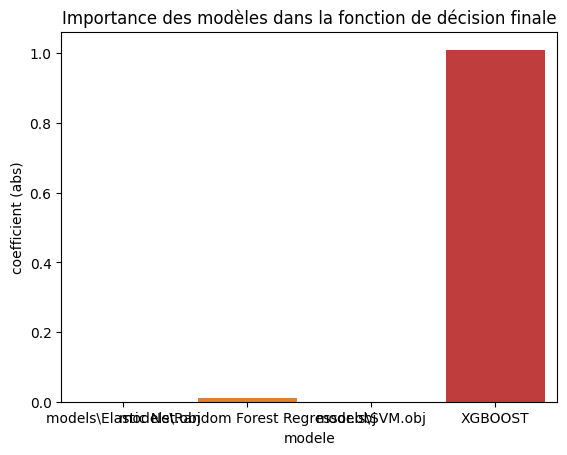

In [842]:
plt.title('Importance des modèles dans la fonction de décision finale')
sns.barplot(x = importance_modeles['modele'],
           y = importance_modeles['coefficient (abs)'])

#  Complément : Bootstrap

Reprendre le bootstrap pour avoir un élément de confiance dans la prédiction : on espère que plus l'erreur est grande plus la variance des prédictions obtenues par bootstrap est grande. Ce qui apporte beaucoup d'informations.

In [843]:
from sklearn.ensemble import RandomForestRegressor
scores = []
model_bootstrap = []
y_pred = []
yvar = []
for i in range(100):
    print('Echantillon ',i+1)
    #on choisit un échantillon bootstrap de l'ensemble du frame
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, 
                                                        replace=True, n_samples = X_train.shape[0])
    #instanciation du modèle
    model_bootstrap.append(RandomForestRegressor(n_jobs = -1, 
                                            max_features = 'sqrt', 
                                            min_samples_leaf = 1,
                                            n_estimators = 500))
    
    model_bootstrap[-1].fit(X_train_bootstrap, y_train_bootstrap)
    
    y_pred.append(model_bootstrap[-1].predict(X_test))
    scores.append(y_pred[i] - y_test.iloc[i])

y_pred = np.array(y_pred)
scores = np.array(scores)
var = []
score = []
for i in range(y_pred.shape[0]):
    var.append(np.var(y_pred[i,:]))
    score.append(np.mean(scores[i,:]))

Echantillon  1
Echantillon  2
Echantillon  3
Echantillon  4
Echantillon  5
Echantillon  6
Echantillon  7
Echantillon  8
Echantillon  9
Echantillon  10
Echantillon  11
Echantillon  12
Echantillon  13
Echantillon  14
Echantillon  15
Echantillon  16
Echantillon  17
Echantillon  18
Echantillon  19
Echantillon  20
Echantillon  21
Echantillon  22
Echantillon  23
Echantillon  24
Echantillon  25
Echantillon  26
Echantillon  27
Echantillon  28
Echantillon  29
Echantillon  30
Echantillon  31
Echantillon  32
Echantillon  33
Echantillon  34
Echantillon  35
Echantillon  36
Echantillon  37
Echantillon  38
Echantillon  39
Echantillon  40
Echantillon  41
Echantillon  42
Echantillon  43
Echantillon  44
Echantillon  45
Echantillon  46
Echantillon  47
Echantillon  48
Echantillon  49
Echantillon  50
Echantillon  51
Echantillon  52
Echantillon  53
Echantillon  54
Echantillon  55
Echantillon  56
Echantillon  57
Echantillon  58
Echantillon  59
Echantillon  60
Echantillon  61
Echantillon  62
Echantillon  63
E

<Axes: title={'center': 'Répartition des variances de prédiction'}, ylabel='Density'>

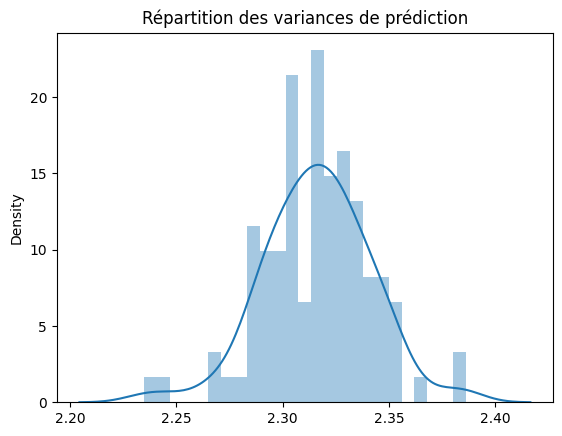

In [845]:
plt.title('Répartition des variances de prédiction')
sns.distplot(var, bins = 25)

<Axes: title={'center': 'Répartition des scores de prédiction'}, ylabel='Density'>

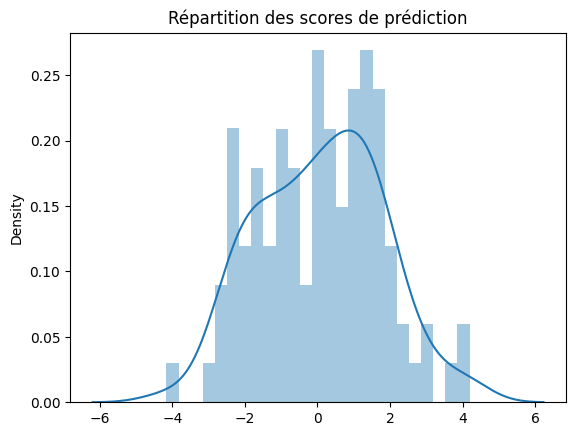

In [846]:
plt.title('Répartition des scores de prédiction')
sns.distplot(score, bins = 25)

In [847]:
for i, el in enumerate(score):
    score[i] = abs(el)

Text(0, 0.5, 'variance')

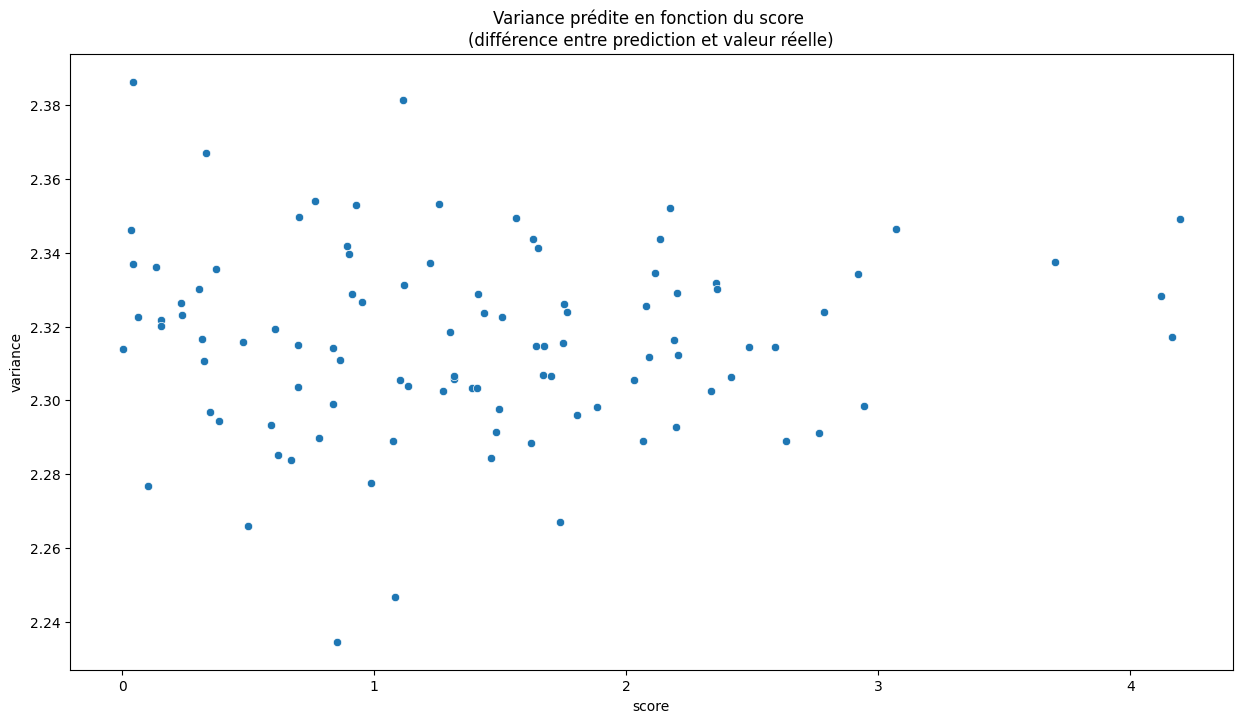

In [848]:
plt.figure(figsize=(15,8))
plt.title('Variance prédite en fonction du score \n(différence entre prediction et valeur réelle)')
sns.scatterplot(x = score, y = var)
plt.xlabel('score')
plt.ylabel('variance')

In [849]:
np.corrcoef(score , var)

array([[1.        , 0.03157414],
       [0.03157414, 1.        ]])

In [850]:
# Chargement des données
df = pd.read_csv('data/data_cleaned_SEU.csv')

In [851]:
df.dtypes

index                              int64  
PrimaryPropertyType                object 
Neighborhood                       object 
YearBuilt                          int64  
NumberofBuildings                  float64
NumberofFloors                     int64  
PropertyGFAParking                 int64  
PropertyGFABuilding(s)             int64  
LargestPropertyUseType             object 
SecondLargestPropertyUseType       object 
SecondLargestPropertyUseTypeGFA    float64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEnergyUse(kBtu)                float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
NaturalGas(kBtu)                   float64
GHGEmissionsIntensity              float64
SteamUse(percent)                  float64
Electricity(percent)               float64
NaturalGas(percent)                float64
Log2-SiteEnergyUseWN(kBtu)         float64
dtype: obje

In [852]:
print(df.columns)

Index(['index', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SteamUse(percent)',
       'Electricity(percent)', 'NaturalGas(percent)',
       'Log2-SiteEnergyUseWN(kBtu)'],
      dtype='object')


In [858]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données
df = pd.read_csv('data/data_cleaned_SEU.csv')

# Vérification de la présence de la colonne 'TotalGHGEmissions'
if 'SiteEnergyUse(kBtu)' not in df.columns:
    raise ValueError("La colonne 'SiteEnergyUse(kBtu)' est introuvable dans le jeu de données")

# # Suppression des colonnes inutiles pour la prédiction
# df.drop(['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier'], axis=1, inplace=True)
columns_to_drop = ['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 
                   'ListOfAllPropertyUseTypes', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier']

# Vérification des colonnes existantes
for column in columns_to_drop:
    if column not in df.columns:
        print(f"La colonne '{column}' n'existe pas dans le DataFrame.")

# Suppression des colonnes
df.drop(columns_to_drop, axis=1, inplace=True)

# Traitement des variables catégorielles avec OneHotEncoder
cat_cols = [col for col in df.columns if df[col].dtype in ['object', 'category']]
print(cat_cols)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Traitement des variables numériques avec StandardScaler
num_cols = [col for col in df.columns if df[col].dtype in ['int8', 'float32','int64', 'float64']]
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Préparation du préprocesseur
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

# Préparation des données pour l'apprentissage
df = df.reset_index(drop=True) # resynchroniser les index
y = df['SiteEnergyUse(kBtu)']
# X = df.drop('TotalGHGEmissions', axis=1)
print(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des modèles à tester avec GridSearchCV
models = [
    {
        'name': 'LinearRegression',
        'estimator': LinearRegression(),
        'hyperparameters': {}
    },
    {
        'name': 'Lasso',
        'estimator': Lasso(),
        'hyperparameters': {
            'alpha': [0.1, 1, 10]
        }
    },
    {
        'name': 'Ridge',
        'estimator': Ridge(),
        'hyperparameters': {
            'alpha': [0.1, 1, 10]
        }
    },
    {
        'name': 'RandomForestRegressor',
        'estimator': RandomForestRegressor(),
        'hyperparameters': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    }
]

# Entraînement et évaluation des modèles avec GridSearchCV et cross-validation
for model in models:
    print(f"Training {model['name']}...")
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model['estimator'])
    ])
    grid = GridSearchCV(pipe, model['hyperparameters'], cv=5, scoring='r2')
    scores = cross_val_score(grid, X_train, y_train, cv=5, scoring='r2')
    grid.fit(X_train, y_train)
    print(f"Best parameters: {grid.best_params_}")
    print(f"Training R2 score: {grid.score(X_train, y_train):.4f}")
    print(f"Test R2 score: {grid.score(X_test, y_test):.4f}")

La colonne 'OSEBuildingID' n'existe pas dans le DataFrame.
La colonne 'DataYear' n'existe pas dans le DataFrame.
La colonne 'PropertyName' n'existe pas dans le DataFrame.
La colonne 'TaxParcelIdentificationNumber' n'existe pas dans le DataFrame.
La colonne 'ListOfAllPropertyUseTypes' n'existe pas dans le DataFrame.
La colonne 'DefaultData' n'existe pas dans le DataFrame.
La colonne 'Comments' n'existe pas dans le DataFrame.
La colonne 'ComplianceStatus' n'existe pas dans le DataFrame.
La colonne 'Outlier' n'existe pas dans le DataFrame.


KeyError: "['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier'] not found in axis"